In [1]:
# %autoreload 0
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = "3"
os.environ["CUDA_VISIBLE_DEVICES"] = "0"
import importlib
import jax
import smoothing_library as SL
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

%matplotlib inline

plt.rcParams.update({'font.size': 13})
print(jax.devices())

[cuda(id=0)]


In [2]:
#setting boxsize and  pixel grid, as well as width ofthe bin kF
#where kf=k_min, as the lowest k represents the largest scale that fits in the box
BoxSize = 1000.
kF = 2*np.pi/BoxSize
grid = 256

In [43]:
#load in the quijote simulation data from hb-CosmoGroup
# X_data = np.array([np.load(f"/scratch/hb-CosmoGroup/Quijote_Density_256/fiducial/0/df_m_256_PCS_fiducial_z=0_{i}.npy") for i in tqdm(range(120))])
# y_data = np.array([np.load(f"/scratch/hb-CosmoGroup/Quijote_Density_256/fiducial/127/df_m_256_PCS_fiducial_z=127_{i}.npy") for i in tqdm(range(3))])

#load dark matter field, z=127, data from own scratch 
y_data =  np.array([np.load(f"/scratch/s3487202/Matter_Data/fiducial/0/df_m_256_PCS_fiducial_127_{i}.npy") for i in tqdm(range(100))])


#X_data_dm = np.array([np.load(f"/scratch/hb-CosmoGroup/Quijote_Density_256/fiducial/0/df_m_256_PCS_fiducial_z=0_{i}.npy") for i in tqdm(range(20))])
# y_data = np.array([np.load(f"/scratch/hb-CosmoGroup/Quijote_Density_256/fiducial/127/df_m_256_PCS_fiducial_z=127_{i}.npy") for i in tqdm(range(6))])



100%|██████████| 100/100 [00:18<00:00,  5.43it/s]


In [44]:
X_data_halo_z =  np.array([np.load(f"/scratch/s3487202/Halo_Data/fiducial/0/0-1000/df_h_256_PCS_fiducial_0_dz_{i}.npy") for i in tqdm(range(100))])

X_data_halo_z = np.squeeze(X_data_halo_z)

100%|██████████| 100/100 [00:18<00:00,  5.54it/s]


NameError: name 'X_data_dm' is not defined

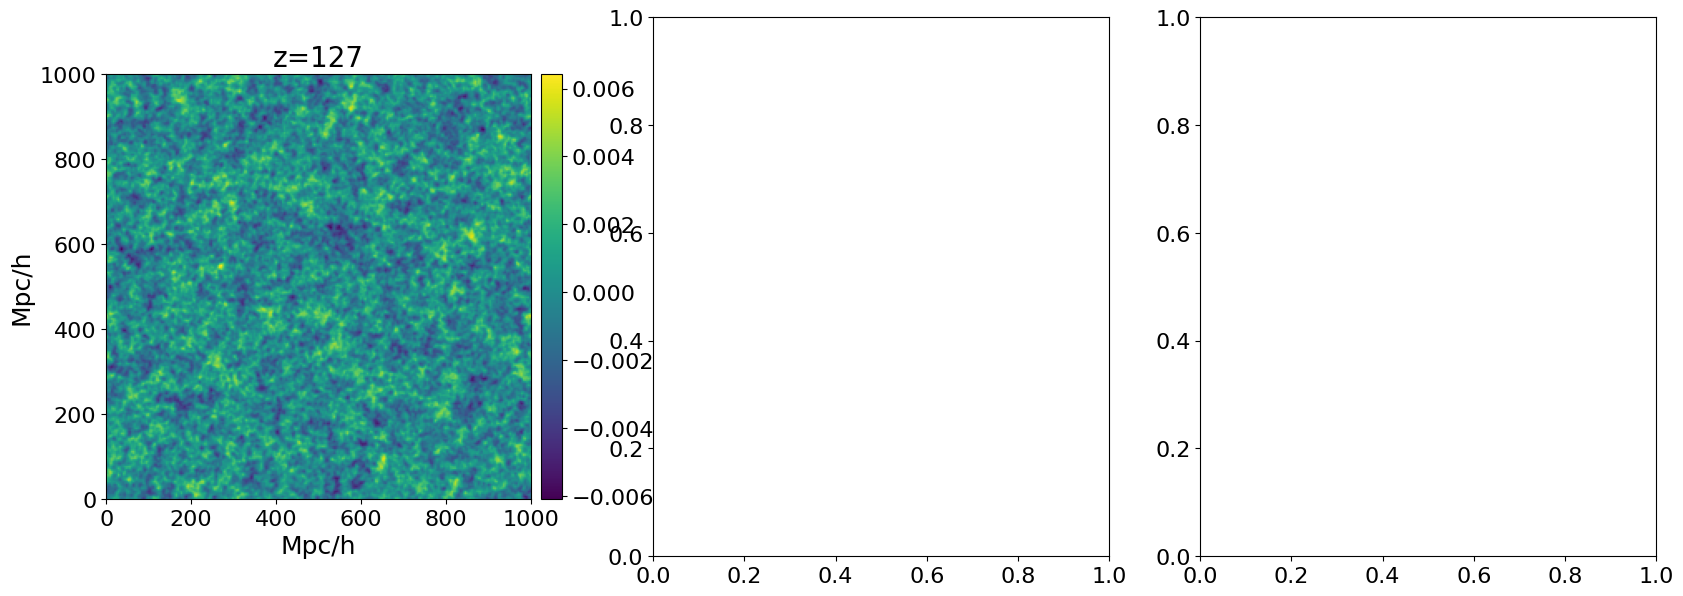

In [29]:
from mpl_toolkits.axes_grid1 import make_axes_locatable


plt.rcParams.update({
    'font.size': 16,        # Default text size
    'axes.labelsize': 18,   # Axis labels
    'axes.titlesize': 20,   # Plot titles
    'xtick.labelsize': 16,  # X-axis tick labels
    'ytick.labelsize': 16   # Y-axis tick labels
})

fig, axes = plt.subplots(1, 3, figsize=(20, 7))

# Plot the second image first
im2 = axes[0].imshow(y_data[0, :, :, :].mean(0), extent=[0, 1000, 0, 1000], cmap='viridis')
axes[0].set_xlabel('Mpc/h')
axes[0].set_ylabel('Mpc/h')
axes[0].set_title('z=127')

# Create a colorbar for the first (formerly second) image with adjusted height
divider1 = make_axes_locatable(axes[0])
cax1 = divider1.append_axes("right", size="5%", pad=0.1)
fig.colorbar(im2, cax=cax1)

# Plot the first image second
im1 = axes[1].imshow(X_data_dm[0, :, :, :].mean(0), extent=[0, 1000, 0, 1000], cmap='viridis')
axes[1].set_xlabel('Mpc/h')
axes[1].set_ylabel('Mpc/h')
axes[1].set_title('z=0')

# Create a colorbar for the second (formerly first) image with adjusted height
divider2 = make_axes_locatable(axes[1])
cax2 = divider2.append_axes("right", size="5%", pad=0.1)
fig.colorbar(im1, cax=cax2)

im2 = axes[2].imshow(X_data_halo_z[0, :, :, :].mean(0), extent=[0, 1000, 0, 1000], cmap='viridis')
axes[2].set_xlabel('Mpc/h')
axes[2].set_ylabel('Mpc/h')
axes[2].set_title('z=0')

# Create a colorbar for the second (formerly first) image with adjusted height
divider3 = make_axes_locatable(axes[2])
cax3 = divider3.append_axes("right", size="5%", pad=0.1)
fig.colorbar(im2, cax=cax3)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.savefig('Plots/dm_halos.pdf', format='pdf', bbox_inches='tight')

plt.show()

print(np.sum(X_data_halo_z[0] == -1))
print(np.sum(X_data_dm[0] == -1))


plt.plot(X_data_dm[0,20,20,:])
# plt.title("1D Slice")
# plt.axis('off')
plt.gca().set_xticks([])
plt.gca().set_yticks([])
plt.axhline(y=5, color='r', linestyle='--')
# plot.plot
# plt.legend(["z=0","z=127 Prediction","z=127 Truth"])
plt.show()

# # plt.hist(X_test[ii].ravel(),bins=1000,density=True) #check why this has more bins
# plt.hist(X_data_dm.ravel(),bins=1000,density=True)
# # plt.hist(y_test[ii].ravel(),bins=100,density=True)
# plt.title("Pixel Histogram")
# plt.xlim(-3,10)
# plt.legend(["z=0","z=127 Prediction","z=127 Truth"])
plt.show()


In [ ]:
#load in variations of data
# X_data_halo =  np.array([np.load(f"/scratch/s3487202/Halo_Data/fiducial/0/Not_Distorted/df_h_256_PCS_fiducial_0_nd_{i}.npy") for i in tqdm(range(81))])
# X_data_halo_t =  np.array([np.load(f"/scratch/s3487202/Halo_Data/fiducial/0/threshold/df_h_256_PCS_fiducial_tresh_0_dx_{i}.npy") for i in tqdm(range(81))])
# # X_data_void =  np.array([np.load(f"/scratch/s3487202/Void_Data/fiducial/0/Not_Distorted/df_v_256_fiducial_0_nd_{i}.npy") for i in tqdm(range(80))])
# # X_data_halo_void = np.array([np.load(f"/scratch/s3487202/Halo_Data/fiducial/0/Halo_Void/df_h_v_256_fiducial_t_0_dz_{i}.npy") for i in tqdm(range(80))])
# #X_data_halo_s8_m =  np.array([np.load(f"/scratch/s3487202/Halo_Data/s8_m/df_h_256_PCS_s8_m_0_dx_{i}.npy") for i in tqdm(range(81))])
# #X_data_h_v =  np.array([np.load(f"/scratch/s3487202/Halo_Data/fiducial/0/Halo_Void/df_h_v_256_fiducial_0_dz_{i}.npy") for i in tqdm(range(68))])

# X_data_halo_t =np.squeeze(X_data_halo_t, axis=1)
# X_data_halo = X_data_halo.astype(np.float32)
# X_data_halo_t = X_data_halo_t.astype(np.float32)
# X_data_halo_s8_m =np.squeeze(X_data_halo_s8_m, axis=1)


In [30]:
# #for mass thresshold

# import readfof
# import readgadget
# import redshift_space_library as RSL
# import MAS_library as MASL
# #load in halo data for different mass thresholds
# #for fiducial
# BoxSize = 1000.
# grid = int(256)
# Hubble = int(100)
# redshift = 0


# snapnum = 4
# kF = 2*np.pi/BoxSize
# threads=8
# axis =2

# numbers = list(range(380,400)) 

# # Pk_z0_array_z = np.zeros((len(numbers), Pks_32_z_s.shape[0], Pks_32_z_s.shape[1]))
# # Pk_z127_rec_array_z = np.zeros((len(numbers), Pks_32_pred_z_s.shape[0], Pks_32_pred_z_s.shape[1]))
# X_data_halo_z_quijote = np.zeros((len(numbers),256,256,256))
# #X_data_halo_z_quijote_2_1 = np.zeros((len(numbers),256,256,256))
# # X_data_halo_z_quijote_3_2 = np.zeros((len(numbers),256,256,256))
# # print(X_data_halo_z_quijote_2_1.shape)

# typey_list = ['fiducial']

# for typey in typey_list:
#     print(f'loop {typey} starts ')
#     for num in numbers:
#         print(num)    
#         snapshot_number = num
#         snapdir = f'/scratch/hb-CosmoGroup/Quijote_Halos/{typey}/{snapshot_number}' #folder hosting the catalogue
       
#         # read the halo catalogue
    
#         FoF = readfof.FoF_catalog(snapdir, snapnum, long_ids=False, swap=False, SFR=False, read_IDs=False)
#         pos_h = FoF.GroupPos / 1e3
#         vel_h = FoF.GroupVel*(1.0+redshift) #Halo peculiar velocities in km/s
#         mass_h  = FoF.GroupMass*1e10 
#         indices = np.where(mass_h >= 3.2e13)
#         pos_h_filt = pos_h[indices]
#         vel_h_filt = vel_h[indices]
#         axis_list = [2] # z axis because void data is distorted in z axis
#         delta_fields = []
#         mean_fields = []
#         # for axis in axis_list:
#         RSL.pos_redshift_space(pos_h_filt, vel_h_filt, BoxSize, Hubble, redshift, axis)
#         delta = np.zeros((grid, grid, grid), dtype=np.float32)
#         #MASL.MA(pos_h_d, delta, BoxSize, MAS, verbose=verbose)
#         MASL.MA(pos_h_filt, delta, BoxSize, 'PCS', verbose=False)
#         # mean_fields.append(np.mean(delta, dtype=np.float32))
#         delta /= np.mean(delta, dtype=np.float32)
#         delta -= 1.0
#         delta_z = delta
#         X_data_halo_z_quijote[num-380] = delta_z
#         #X_data_halo_z_quijote_2_1[num-380] = delta_z
#         # X_data_halo_z_quijote_3_2[num-380] = delta_z

# X_data_halo_z_quijote =  X_data_halo_z_quijote.astype(np.float32) 
# #X_data_halo_z_quijote_2_1 =  X_data_halo_z_quijote_2_1.astype(np.float32)
# # X_data_halo_z_quijote_3_2 =  X_data_halo_z_quijote_3_2.astype(np.float32) 
# print('loop done')        

In [31]:
# for mass index
# import numpy as np
# import readfof
# import readgadget
# import redshift_space_library as RSL
# import MAS_library as MASL
# import matplotlib.pyplot as plt

# # Parameters
# BoxSize = 1000.0
# grid = 256
# Hubble = 100
# redshift = 0
# snapnum = 4
# kF = 2 * np.pi / BoxSize
# threads = 8
# axis = 2
# numbers = list(range(2))

# # Initialize the data structure
# X_data_halo_z_quijote_3_2 = np.zeros((len(numbers), grid, grid, grid), dtype=np.float32)

# # Function to bin the mass data
# def bin_mass_data(mass_data, bin_size):
#     min_mass = np.min(mass_data)
#     max_mass = np.max(mass_data)
#     bins = np.arange(min_mass, max_mass + bin_size, bin_size)
#     bin_indices = np.digitize(mass_data, bins) - 1
#     print(bin_indices)
#     print(len(bins))
#     return bin_indices, bins

# # Function to process the data and generate the halo fields
# def process_halo_data(bin_size):
#     for typey in ['fiducial']:
#         print(f'Processing type: {typey} with bin size: {bin_size}')
#         for idx, num in enumerate(numbers):
#             print(f'Processing snapshot number: {num}')
#             snapshot_number = num
#             snapdir = f'/scratch/hb-CosmoGroup/Quijote_Halos/{typey}/{snapshot_number}'
            
#             # Read the halo catalogue
#             FoF = readfof.FoF_catalog(snapdir, snapnum, long_ids=False, swap=False, SFR=False, read_IDs=False)
#             pos_h = FoF.GroupPos / 1e3
#             vel_h = FoF.GroupVel * (1.0 + redshift) # Halo peculiar velocities in km/s
#             mass_h = FoF.GroupMass * 1e10

#             # Bin the mass data
#             bin_indices, bins = bin_mass_data(mass_h, bin_size)

#             # Apply redshift space distortion
#             RSL.pos_redshift_space(pos_h, vel_h, BoxSize, Hubble, redshift, axis)

#             # Generate the halo field with weights based on mass bins
#             delta = np.zeros((grid, grid, grid), dtype=np.float32)
#             MASL.MA(pos_h, delta, BoxSize, 'PCS', W=bin_indices.astype(np.float32), verbose=False)
#             delta /= np.mean(delta, dtype=np.float32)
#             delta -= 1.0

#             # Store the result
#             X_data_halo_z_quijote_3_2[idx] = delta

#     return X_data_halo_z_quijote_3_2

# # Example usage
# bin_size = 1e13  # Adjust the bin size as needed
# halo_fields = process_halo_data(bin_size)

# # Investigate distribution function
# def investigate_distribution(data):
#     data_array = data.flatten()
#     print("Mean:", np.mean(data_array))
#     print("Median:", np.median(data_array))
#     print("Standard Deviation:", np.std(data_array))
    
#     num_counts, bin_edges = np.histogram(data_array, bins=100)
#     plt.hist(data_array, bins=50, color='blue', edgecolor='black')
#     plt.xlim(0, 1e15)
#     plt.title('Distribution of Values')
#     plt.xlabel('Values')
#     plt.ylabel('Frequency')
#     plt.show()

#     return num_counts, bin_edges


# num_counts, bin_edges = investigate_distribution(mass_h)
# print(num_counts)
# total_halos = num_counts.sum()
# num_mean = num_counts / total_halos

# bin_indices = np.digitize(mass_h, bin_edges)
# # bin_indices = np.minimum(bin_indices, 100)

# data_point_bin_counts = (1 / num_mean[bin_indices - 1]) - 1
# print(data_point_bin_counts)
# print(bin_indices)
# print(mass_h)

# # Construct 3D halo field
# delta_index = np.zeros((grid, grid, grid), dtype=np.float32)
# delta_mass = np.zeros((grid, grid, grid), dtype=np.float32)

# bin_indices = bin_indices.astype(np.float32)
# MASL.MA(pos_h, delta_index, BoxSize, 'PCS', W=bin_indices, verbose=False)
# MASL.MA(pos_h, delta_mass, BoxSize, 'PCS', W=mass_h, verbose=False)

# print('%.3f < delta < %.3f' % (np.min(delta_mass), np.max(delta_mass)))
# print('<delta> = %.3f' % np.mean(delta_mass))


In [32]:
#self not, print mass_h info in order to check the index but then its good
import numpy as np
import readfof
import readgadget
import redshift_space_library as RSL
import MAS_library as MASL
import matplotlib.pyplot as plt

# Parameters
BoxSize = 1000.0
grid = 256
Hubble = 100
redshift = 0
snapnum = 4
kF = 2 * np.pi / BoxSize
threads = 8
axis = 2
numbers = list(range(20))

# Initialize the data structure


# Function to bin the mass data based on the number of bins
def bin_mass_data_equal_number(mass_data, num_bins):
    # print(mass_data)
    sorted_mass = np.sort(mass_data)
    # print(sorted_mass)
    bin_edges = np.interp(np.linspace(0, len(sorted_mass), num_bins + 1), np.arange(len(sorted_mass)), sorted_mass)
    bin_indices = np.digitize(mass_data, bin_edges) 
    # print(bin_indices)
    # print(bin_edges)
    # print(len(bin_edges))
    return bin_indices, bin_edges

# Function to process the data and generate the halo fields
def process_halo_data(num_bins):
    for typey in ['fiducial']:
        X_data_halo_z_quijote_3_2 = np.zeros((len(numbers), grid, grid, grid), dtype=np.float32)
        print(f'Processing type: {typey} with {num_bins} bins')
        for idx, num in enumerate(numbers):
            print(f'Processing snapshot number: {num}')
            snapshot_number = num
            snapdir = f'/scratch/hb-CosmoGroup/Quijote_Halos/{typey}/{snapshot_number}'
            
            # Read the halo catalogue
            FoF = readfof.FoF_catalog(snapdir, snapnum, long_ids=False, swap=False, SFR=False, read_IDs=False)
            pos_h = FoF.GroupPos / 1e3
            vel_h = FoF.GroupVel * (1.0 + redshift) # Halo peculiar velocities in km/s
            mass_h = FoF.GroupMass * 1e10

            # Bin the mass data
            bin_indices, bin_edges = bin_mass_data_equal_number(mass_h, num_bins)
            # print(pos_h)
            # print(mass_h)
            # print(bin_indices)
            # Apply redshift space distortion
            RSL.pos_redshift_space(pos_h, vel_h, BoxSize, Hubble, redshift, axis)

            # Generate the halo field with weights based on mass bins
            delta = np.zeros((grid, grid, grid), dtype=np.float32)
            # MASL.MA(pos_h, delta, BoxSize, 'PCS', W=bin_indices.astype(np.float32), verbose=False)
            MASL.MA(pos_h, delta, BoxSize, 'PCS', W=mass_h, verbose=False)
            delta /= np.mean(delta, dtype=np.float32)
            delta -= 1.0

            # Store the result
            X_data_halo_z_quijote_3_2[idx] = delta

    return X_data_halo_z_quijote_3_2

# Example usage
num_bins = 199  # Adjust the number of bins as needed
# halo_fields_binned_1 = process_halo_data(0)
# halo_fields_binned_100 = process_halo_data(100)
# halo_fields_mass= process_halo_data(0)
halo_fields_binned_1000 = process_halo_data(0)
# Investigate distribution function
def investigate_distribution(data):
    data_array = data.flatten()
    print("Mean:", np.mean(data_array))
    print("Median:", np.median(data_array))
    print("Standard Deviation:", np.std(data_array))
    
    num_counts, bin_edges = np.histogram(data_array, bins=100)
    plt.hist(data_array, bins=50, color='blue', edgecolor='black')
    plt.xlim(0, 1e15)
    plt.title('Distribution of Values')
    plt.xlabel('Values')
    plt.ylabel('Frequency')
    plt.show()

    return num_counts, bin_edges



Processing type: fiducial with 0 bins
Processing snapshot number: 0
Processing snapshot number: 1
Processing snapshot number: 2
Processing snapshot number: 3
Processing snapshot number: 4
Processing snapshot number: 5
Processing snapshot number: 6
Processing snapshot number: 7
Processing snapshot number: 8
Processing snapshot number: 9
Processing snapshot number: 10
Processing snapshot number: 11
Processing snapshot number: 12
Processing snapshot number: 13
Processing snapshot number: 14
Processing snapshot number: 15
Processing snapshot number: 16
Processing snapshot number: 17
Processing snapshot number: 18
Processing snapshot number: 19


In [33]:
# print(halo_fields[0,80:100,30,30])

In [34]:
import jax.numpy as jnp
from jax.numpy.fft import rfftn, irfftn

def cutfield(delta, BoxSize, grid, maxk_kF):
    # Cuts the density field at kmax = maxk_kF * kF 
    kF = 2 * jnp.pi / BoxSize
    cell_size = BoxSize / grid

    # Create the k-space grid
    kx = 2 * jnp.pi * jnp.fft.fftfreq(grid, cell_size)
    ky = 2 * jnp.pi * jnp.fft.fftfreq(grid, cell_size)
    kz = 2 * jnp.pi * jnp.fft.rfftfreq(grid, cell_size)
    kx, ky, kz = jnp.meshgrid(kx, ky, kz, indexing="ij")
    kgrid = jnp.sqrt(kx**2 + ky**2 + kz**2)

    # Create a boolean mask for the cut-off
    bools = (kgrid >= maxk_kF * kF)

    # Apply Fourier Transform, filter and then apply Inverse Fourier Transform
    c_fftgrid = rfftn(delta)
    c_fftgrid = jnp.where(bools, 0.+0.j, c_fftgrid)
    r_fftgrid = irfftn(c_fftgrid)

    return r_fftgrid

In [45]:
from jax import vmap
import jax.numpy as jnp
from jax.numpy.fft import rfftn, irfftn

# Vectorize cutfield for batch processing
batch_cutfield = vmap(cutfield, in_axes=(0, None, None, None))

# Assuming y_data is a JAX array and BoxSize, grid are defined
batch_size = 10

# Process each batch and normalize it before moving to the next batch
y_data_cut = np.zeros((y_data.shape[0],y_data.shape[1],y_data.shape[2],y_data.shape[3]),dtype=np.float32)
for i in range(0, y_data.shape[0], batch_size):
    print(i)
    batch = y_data[i:i + batch_size]
    processed_batch = batch_cutfield(batch, BoxSize, grid, 82.5)

    # Normalize the processed batch
    processed_batch /= processed_batch.reshape(processed_batch.shape[0], -1).std()
    processed_batch = np.array(processed_batch)

    y_data_cut[i:i + batch_size] = processed_batch





0
10
20
30
40
50
60
70
80
90


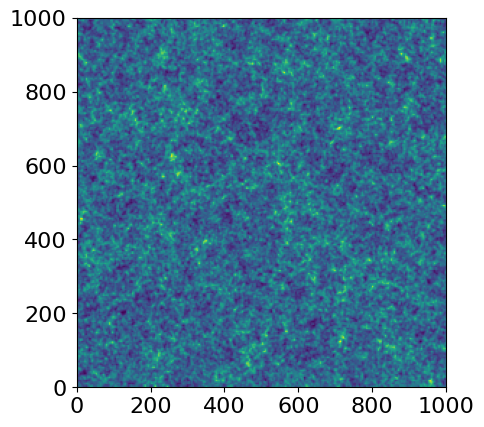

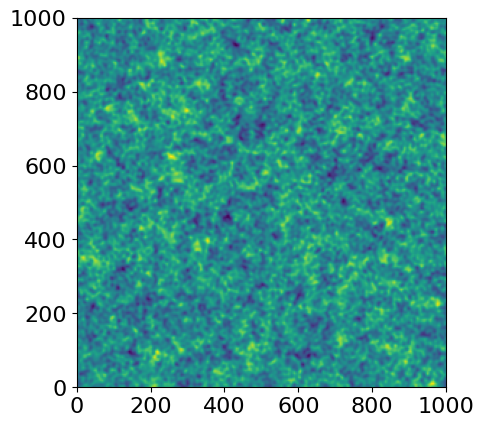

NameError: name 'one_pred' is not defined

In [46]:
# plt.imshow(fields_x_smoothed[0,:,:,:].mean(2),extent=[0,1000,0,1000])
# plt.xlabel('Mpc/h')
# plt.ylabel('Mpc/h')
# plt.colorbar()
# plt.show()

plt.imshow(X_data_halo_z[0,:,:,:].mean(2),extent=[0,1000,0,1000])
# plt.xlabel('Mpc/h')
# plt.ylabel('Mpc/h')
# plt.colorbar()
# plt.title('z=0')
plt.savefig('Plots/presentation_input.pdf',format='pdf',bbox_inches='tight')
plt.show()

# plt.imshow(y_data_cut[20,:,:,:].mean(2),extent=[0,1000,0,1000])
# plt.xlabel('Mpc/h')
# plt.ylabel('Mpc/h')
# plt.colorbar()
# plt.show()

# plt.imshow(y_data_scaled[0,:,:,:].mean(2),extent=[0,1000,0,1000])
# plt.xlabel('Mpc/h')
# plt.ylabel('Mpc/h')
# plt.colorbar()
# plt.show()


plt.imshow(y_data_cut[0,:,:,:].mean(2), extent=[0,1000,0,1000])

# plt.xticks([])  # Remove x-axis ticks and labels
# plt.yticks([])  # Remove y-axis ticks and labels
# plt.gca().set_aspect('equal', adjustable='box')
# plt.colorbar()
plt.savefig('Plots/presentation_target.pdf',format='pdf',bbox_inches='tight', pad_inches=0)
plt.show()



plt.imshow(one_pred[:,:,:].mean(2),extent=[0,1000,0,1000])

# plt.xticks([])  # Remove x-axis ticks and labels
# plt.yticks([]) 
# plt.colorbar()
plt.savefig('Plots/presentation_recon.pdf',format='pdf',bbox_inches='tight', pad_inches=0)
plt.show()


# plt.imshow(halo_fields_mass[2,:,:,:].mean(2),extent=[0,1000,0,1000])

# plt.xticks([])  # Remove x-axis ticks and labels
# plt.yticks([]) 
# plt.colorbar()
# # plt.savefig('Plots/Daan_input.png',format='png',bbox_inches='tight', pad_inches=0)
# plt.show()



# plt.imshow(halo_fields_binned_200[2,:,:,:].mean(2),extent=[0,1000,0,1000])

# plt.xticks([])  # Remove x-axis ticks and labels
# plt.yticks([]) 
# plt.colorbar()
# # plt.savefig('Plots/Daan_input.png',format='png',bbox_inches='tight', pad_inches=0)
# plt.show()

# plt.imshow(X_data_halo_z_quijote_2_1[2,:,:,:].mean(2),extent=[0,1000,0,1000])

# plt.xticks([])  # Remove x-axis ticks and labels
# plt.yticks([]) 
# plt.colorbar()
# # plt.savefig('Plots/Daan_input.png',format='png',bbox_inches='tight', pad_inches=0)
# plt.show()

# plt.imshow(halo_fields_binned_100[20,:,:,:].mean(2),extent=[0,1000,0,1000])

# plt.xticks([])  # Remove x-axis ticks and labels
# plt.yticks([]) 
# plt.colorbar()
# # plt.savefig('Plots/Daan_input.png',format='png',bbox_inches='tight', pad_inches=0)
# plt.show()



In [47]:
# #single halo data
# X_data_halo_x = X_data_halo_x.astype(np.float16)
# y_data_cut = y_data_cut.astype(np.float16)

X_train = X_data_halo_z[:50][:,:,:,:,np.newaxis]
X_val = X_data_halo_z[50:80][:,:,:,:,np.newaxis]
X_test = X_data_halo_z[80:100][:,:,:,:,np.newaxis]

# X_train_check = X_data_halo_z[:250][:,:,:,:,np.newaxis]
# X_val_check = X_data_halo_z[250:380][:,:,:,:,np.newaxis]
# X_test_check = X_data_halo_z[380:][:,:,:,:,np.newaxis]



# X_train = halo_fields_binned_100[:250][:,:,:,:,np.newaxis]
# X_val = halo_fields_binned_100[250:380][:,:,:,:,np.newaxis]
# X_test = halo_fields_binned_100[380:][:,:,:,:,np.newaxis]

# X_train = halo_fields_mass[:250][:,:,:,:,np.newaxis]
# X_val = halo_fields_mass[250:380][:,:,:,:,np.newaxis]
# X_test = halo_fields_mass[380:][:,:,:,:,np.newaxis]

# X_train = fields_x_smoothed[:70][:,:,:,:,np.newaxis]
# X_val = fields_x_smoothed[70:85][:,:,:,:,np.newaxis]
# X_test = fields_x_smoothed[85:][:,:,:,:,np.newaxis]

# X_train_void = X_data_void[:45][:,:,:,:,np.newaxis]
# X_val_void = X_data_void[45:55][:,:,:,:,np.newaxis]
# X_test_void = X_data_void[55:][:,:,:,:,np.newaxis]

y_train = y_data_cut[:50][:,:,:,:,np.newaxis]
y_val = y_data_cut[50:80][:,:,:,:,np.newaxis]
y_test = y_data_cut[80:100][:,:,:,:,np.newaxis]

# # y_train = y_data_cut[:250][:,:,:,:,np.newaxis]
# # y_val = y_data_cut[250:380][:,:,:,:,np.newaxis]
# y_test = y_data_cut[:20][:,:,:,:,np.newaxis]

# y_train = y_data_scaled[:60][:,:,:,:,np.newaxis]
# y_val = y_data_scaled[60:65][:,:,:,:,np.newaxis]
# y_test = y_data_scaled[65:][:,:,:,:,np.newaxis]


# # #for plotting
# X_test_1 = halo_fields_binned_1[380:400][:,:,:,:,np.newaxis]
# X_test_99 = halo_fields_binned_100[380:400][:,:,:,:,np.newaxis]
# X_test_9999 = halo_fields_binned_1000[380:400][:,:,:,:,np.newaxis]
# y_test = y_data_cut[:20][:,:,:,:,np.newaxis]
# X_test_1 = halo_fields_binned_1[:20][:,:,:,:,np.newaxis]
# X_test_99 = halo_fields_binned_100[:20][:,:,:,:,np.newaxis]
# X_test_9999 = halo_fields_binned_1000[:20][:,:,:,:,np.newaxis]

# print(np.sum(X_test_1 >= -1))
# print(np.sum(X_test >= -1))
# print(y_test.shape)
# print(X_test.dtype)

In [38]:
from flax.training import train_state, checkpoints
from flax import linen as nn
from typing import Any
import logging
from collections import defaultdict
from itertools import cycle
import optax
import joblib
from jax import jit


def chunks(lst, size):
    for i in range(0, len(lst), size):
        yield lst[i:i + size]

class TrainState(train_state.TrainState):
    # A simple extension of TrainState to also include batch statistics
    batch_stats: Any

In [39]:
class TrainerModule:

    def __init__(self,
                 model_name : str,
                 model_class : nn.Module,
                 model_hparams : dict,
                 optimizer_name : str,
                 optimizer_hparams : dict,
                 # optimzer : 
                 exmp_imgs : Any,
                 seed=41):
        """
        Module for summarizing all training functionalities for classification on CIFAR10.

        Inputs:
            model_name - String of the class name, used for logging and saving
            model_class - Class implementing the neural network
            model_hparams - Hyperparameters of the model, used as input to model constructor
            optimizer_name - String of the optimizer name, supporting ['sgd', 'adam', 'adamw']
            optimizer_hparams - Hyperparameters of the optimizer, including learning rate as 'lr'
            exmp_imgs - Example imgs, used as input to initialize the model
            seed - Seed to use in the model initialization
        """
        super().__init__()
        self.model_name = model_name
        self.model_class = model_class
        self.model_hparams = model_hparams
        self.optimizer_name = optimizer_name
        self.optimizer_hparams = optimizer_hparams
        self.optimizer = None
        self.seed = seed
        # Create empty model. Note: no parameters yet
        self.model = self.model_class(**self.model_hparams)
        # Prepare logging
        self.log_dir = os.path.abspath(os.path.join(CHECKPOINT_PATH, self.model_name))
        self.logger = logging.getLogger(model_name)
        # Create jitted training and eval functions
        init_rng = jax.random.PRNGKey(self.seed)
        _, self.dropout_key = jax.random.split(init_rng)
        self.create_functions()
        self.state = None 
        self.init_model(exmp_imgs)
        # self.init_optimizer()
        # Initialize model


    # def create_functions(self):
    #     # Function to calculate the MSE loss for a model
    #     def calculate_loss(params, batch_stats, dropout_key, batch, training):
    #         imgs, labels = batch
    #         rngs = {'dropout': dropout_key} if training else {}
    #         # Run model. During training, we need to update the BatchNorm statistics and apply dropout.
    #         outs = self.model.apply({'params': params, 'batch_stats': batch_stats},
    #                                 imgs, training=training,
    #                                 rngs=rngs, mutable=['batch_stats'] if training else False)
    #         predictions, new_model_state = outs if training else (outs, None)
    #         # Use Mean Squared Error as loss function
    #         loss = optax.squared_error(predictions, labels).mean()
    #         return loss, new_model_state
        
    #     # Training function in order toalso implement validation data setto backpropogate
    #     def train_step(state, train_batch, val_batch, dropout_key):
    #         def loss_fn(params):
    #             train_loss, new_model_state_train = calculate_loss(params, state.batch_stats, dropout_key, train_batch, training=True)
    #             val_loss, new_model_state_val = calculate_loss(params, state.batch_stats, dropout_key, val_batch, training=False)
    #             combined_loss = train_loss + val_loss 
    #             return combined_loss, (new_model_state_train, new_model_state_val)
        
    #         ret, grads = jax.value_and_grad(loss_fn, has_aux=True)(state.params)
    #         loss, (new_model_state_train, new_model_state_val) = ret
    #         state = state.apply_gradients(grads=grads, batch_stats=new_model_state_train['batch_stats'])
    #         return state, loss


            
    #     # Eval function
    #     def eval_step(state, batch):

    #         # For evaluation, only the loss is relevant
    #         loss, _ = calculate_loss(state.params, state.batch_stats, None, batch, training=False)
    #         return loss
    
    #     self.train_step = jax.jit(train_step)
    #     self.eval_step = jax.jit(eval_step)

    def create_functions(self):
        # @jit
        # def compute_weights(y_true): #from the 3 checkpoint
        #     a1, a2, a3, a4, a5, a6 = 0.65, 0.3,0.44, 0.6, 3, 0.8
        #     b = -2.31# Continuity constraint
        #     weights = jnp.where(y_true <= -3, jnp.abs(a4*y_true)**a5+a6, #5.29
        #               jnp.where(y_true <= -1.5, jnp.abs(a1*y_true),
        #               jnp.where(y_true <= -0.5, jnp.abs(a2*y_true)+a3,
        #               jnp.where(y_true <= 0.5, a2,
        #               jnp.where(y_true <= 1.5, jnp.abs(a2*y_true)+a3,
        #               jnp.where(y_true <= 3, jnp.abs(a1*y_true),
        #               jnp.abs(a4*y_true)**a5+a6))))))
        #     return weights
        
        # @jit
        # def compute_weights(y_true):

        #     a1, a2, a3, a4, a5, a6, a7,a8 = 0.6, 0.25, 0.50, 0.55, 3, -0.25, 2, -0.17 #change a3 and a6 to make continious
        #     # a1, a2, a3, a4, a5, a6 = 0.6, 0.25, 0.5, 0.5, 3, 0.8

        #     weights =   jnp.where(y_true < -3, jnp.abs(a4*y_true)**a5+a6, #5.29  
        #                 # jnp.where(y_true <= -3, jnp.abs(a4*y_true)**a5+a6, #5.29
        #                 jnp.where(y_true < -1.5, jnp.abs(a1*y_true)**a7+a8,
        #                 jnp.where(y_true < -0.8, jnp.abs(a2*y_true)+a3, #next step maybe make 0.4 bigger as the seen from true prob distri
        #                 jnp.where(y_true <= 0.8, a1,
        #                 jnp.where(y_true <= 1.5, jnp.abs(a2*y_true)+a3,
        #                 jnp.where(y_true <= 3, jnp.abs(a1*y_true)**a7+a8,
        #                 jnp.abs(a4*y_true)**a5+a6))))))
        #                   # jnp.abs(a4*y_true)**a5+a6))))))
        #     return weights
        
        # def gaussian_pdf(x, mu, sigma):
        #     return jnp.exp(-0.5 * jnp.square((x - mu) / sigma)) / (jnp.sqrt(2 * jnp.pi) * sigma)

        # def compute_weights(y_true, mu=0, sigma=1, g=1):

        #     gaussian = g * gaussian_pdf(y_true, mu, sigma)
        #     weights = 1.0-gaussian
        #     return weights
        
        # def compute_weights(y_true, mu=0, scale=5, g=0.5):

        #     distance = jnp.abs(y_true - mu)
        #     # Normalize and invert the weights so that values further from mu are penalized more
        #     weights =  g+(distance / scale)
        #     # Ensure that weights are non-negative
        #     # weights = jnp.clip(weights, 0, 1)
        #     return weights

        # def msle_loss(y_true, y_pred):
        #     return jnp.mean(jnp.square(jnp.log1p(y_true) - jnp.log1p(y_pred)))
            
        def calculate_loss(params, batch_stats, dropout_key, batch, training):
            imgs, labels = batch
            rngs = {'dropout': dropout_key} if training else {}
            outs = self.model.apply({'params': params, 'batch_stats': batch_stats},
                                    imgs, training=training, rngs=rngs, 
                                    mutable=['batch_stats'] if training else False)
            predictions, new_model_state = outs if training else (outs, None)
    
            # Calculate weights based on the true density values
            # weights = compute_weights(labels)
            # absolute_difference = jnp.abs(predictions - labels)

            # weighted_difference = weights * absolute_difference
    
            # Use the weighted absolute difference as loss function
            # loss = weighted_difference.mean()
            # Use Optax's huber_loss function
            # loss = optax.huber_loss(predictions, labels, delta=0.5).mean()
            # mean squared logarithmic error
            # loss = msle_loss(labels, predictions)
            loss = optax.squared_error(predictions, labels).mean()
            return loss, new_model_state
            # Eval function

        @jit    
        def train_step(state, train_batch, val_batch, dropout_key):
            def loss_fn(params):
                train_loss, new_model_state_train = calculate_loss(params, state.batch_stats, dropout_key, train_batch, training=True)
                val_loss, new_model_state_val = calculate_loss(params, state.batch_stats, dropout_key, val_batch, training=False)
                combined_loss = train_loss + val_loss 
                return combined_loss, (new_model_state_train, new_model_state_val)
        
            ret, grads = jax.value_and_grad(loss_fn, has_aux=True)(state.params)
            loss, (new_model_state_train, new_model_state_val) = ret
            state = state.apply_gradients(grads=grads, batch_stats=new_model_state_train['batch_stats'])
            return state, loss
        @jit
        def eval_step(state, batch):

            # For evaluation, only the loss is relevant
            loss, _ = calculate_loss(state.params, state.batch_stats, None, batch, training=False)
            return loss
            
        self.train_step = jax.jit(train_step)
        self.eval_step = jax.jit(eval_step)

    
    def init_model(self, exmp_imgs):
        """
        Initialize model parameters and batch statistics, and create training state.
        This method should be called only if there is no pre-trained model.
        """
        if self.state is None:
            # Initialize model only if self.state is None
            init_rng = jax.random.PRNGKey(self.seed)
            # Split the RNG key for different components
            init_key, dropout_key = jax.random.split(init_rng, 2)
        
            # Initialize model with the structured RNG keys and example images
            variables = self.model.init({'params': init_key, 
                                         'batch_stats': init_key, 
                                         'dropout': dropout_key}, 
                                        exmp_imgs, 
                                        mutable=['params', 'batch_stats'])
        
            # Extract initialized parameters and batch statistics
            self.init_params = variables['params']
            self.init_batch_stats = variables['batch_stats']
            self.state = None
            
    def init_optimizer(self, num_epochs=None, num_steps_per_epoch=None): # exponential moving average opzoeken en toevoegen
        if self.optimizer is None:
  
            if self.optimizer_name.lower() == 'adam':
                opt_class = optax.adam
            elif self.optimizer_name.lower() == 'adamw':
                opt_class = optax.adamw
            elif self.optimizer_name.lower() == 'sgd':
                opt_class = optax.sgd
            else:
                raise ValueError(f'Unknown optimizer "{self.optimizer_name}"')

            lr_schedule = optax.piecewise_constant_schedule(
                init_value=self.optimizer_hparams.pop('lr'),
                boundaries_and_scales={int(num_steps_per_epoch*num_epochs*0.95): 1e-3}
            )

            transf = [optax.clip(1.0)]
            if opt_class == optax.sgd and 'weight_decay' in self.optimizer_hparams:  # wd is integrated in adamw
                transf.append(optax.add_decayed_weights(self.optimizer_hparams.pop('weight_decay')))
            self.optimizer = optax.chain(
                *transf,
                opt_class(lr_schedule, **self.optimizer_hparams)
            )

            self.state = TrainState.create(
                apply_fn=self.model.apply,
                params=self.init_params,
                batch_stats=self.init_batch_stats,
                tx=self.optimizer
            )

    

    def train_model(self, X_train, y_train, X_val, y_val, num_epochs=5):
        num_steps_per_epoch = len(X_train) // BATCH_SIZE
        # Initialize the optimizer only if it hasn't been initialized
        if self.optimizer is None:
            self.init_optimizer(num_epochs, num_steps_per_epoch)
    
        best_eval = float('inf')
        for epoch_idx in tqdm(range(1, num_epochs + 1)):
            # Split the dropout key at the start of each epoch
            self.dropout_key, _ = jax.random.split(self.dropout_key)
            
            self.train_epoch(X_train, y_train, X_val, y_val, epoch=epoch_idx, dropout_key=self.dropout_key)
       
            eval_loss = self.eval_model(X_val, y_val)
            print(f"Validation Loss for Epoch {epoch_idx}: {eval_loss:.4f}")
            if eval_loss <= best_eval:
                best_eval = eval_loss
                self.save_model(step=epoch_idx)
                #self.logger.flush()



    def train_epoch(self, X_train, y_train, X_val, y_val, epoch, dropout_key):
        metrics = defaultdict(list)
        val_iter =  cycle(zip(chunks(X_val, BATCH_SIZE), chunks(y_val, BATCH_SIZE)))  # Create a cycle iterator for validation data
  # Create a cycle iterator for validation data
    
        for i in range(0, len(X_train), BATCH_SIZE):
            train_batch_x = X_train[i:i+BATCH_SIZE]
            train_batch_y = y_train[i:i+BATCH_SIZE]
            train_batch = (train_batch_x, train_batch_y)
    
            val_batch_x, val_batch_y = next(val_iter)  # Get a batch from validation data
            val_batch = (val_batch_x, val_batch_y)
    
            self.state, loss = self.train_step(self.state, train_batch, val_batch, dropout_key)
            # print(f"Average Loss for Epoch {epoch}: {loss:.4f}")
            metrics['loss'].append(loss)
  
    def eval_model(self, X, y):
        total_loss = 0
        count = 0
        for i in range(0, len(X), BATCH_SIZE):
            batch_x = X[i:i+BATCH_SIZE]
            batch_y = y[i:i+BATCH_SIZE]
            batch = (batch_x, batch_y)

            loss = self.eval_step(self.state, batch)
            total_loss += loss * len(batch_x)
            count += len(batch_x)
        
        avg_loss = total_loss / count
        return avg_loss



    def save_model(self, step=0):
        os.makedirs(self.log_dir, exist_ok=True)
        save_path = os.path.join(self.log_dir, f'model.joblib')
        
        state_to_save = {
            'params': self.state.params,
            'batch_stats': self.state.batch_stats,
            'optimizer_state': self.state.opt_state  # Assuming you have the optimizer state in your TrainState
        }
        joblib.dump(state_to_save, save_path)
        print(f"Model saved at {save_path}")
    

    def load_model(self,num_epochs = 5):
        load_path = os.path.join(self.log_dir, 'model.joblib')
        num_steps_per_epoch = len(X_train) // BATCH_SIZE
        if os.path.exists(load_path):
            state_dict = joblib.load(load_path)
    
            if 'optimizer_state' in state_dict:
                # Initialize a new optimizer and create a new state
                self.init_optimizer(num_epochs, num_steps_per_epoch)
                self.state = self.state.replace(
                    apply_fn=self.model.apply,
                    params=state_dict['params'],
                    batch_stats=state_dict['batch_stats'],
                    tx=self.optimizer
                )
        else:
            print(f"No saved model found at {load_path}. Initializing new model.")
            self.init_model(self.example_images)

    
    def checkpoint_exists(self):
        # Use the same directory as in save_model and load_model
        checkpoint_file = os.path.join(self.log_dir, 'model.joblib')
        return os.path.isfile(checkpoint_file)

In [40]:
class TrainerModule_EMA:

    def __init__(self,
                 model_name : str,
                 model_class : nn.Module,
                 model_hparams : dict,
                 optimizer_name : str,
                 optimizer_hparams : dict,
                 # optimzer : 
                 exmp_imgs : Any,
                 seed=41):
        """
        Module for summarizing all training functionalities for classification on CIFAR10.

        Inputs:
            model_name - String of the class name, used for logging and saving
            model_class - Class implementing the neural network
            model_hparams - Hyperparameters of the model, used as input to model constructor
            optimizer_name - String of the optimizer name, supporting ['sgd', 'adam', 'adamw']
            optimizer_hparams - Hyperparameters of the optimizer, including learning rate as 'lr'
            exmp_imgs - Example imgs, used as input to initialize the model
            seed - Seed to use in the model initialization
        """
        super().__init__()
        self.model_name = model_name
        self.model_class = model_class
        self.model_hparams = model_hparams
        self.optimizer_name = optimizer_name
        self.optimizer_hparams = optimizer_hparams
        self.optimizer = None
        self.seed = seed
        # Create empty model. Note: no parameters yet
        self.model = self.model_class(**self.model_hparams)
        # Prepare logging
        self.log_dir = os.path.abspath(os.path.join(CHECKPOINT_PATH, self.model_name))
        self.logger = logging.getLogger(model_name)
        # Create jitted training and eval functions
        init_rng = jax.random.PRNGKey(self.seed)
        _, self.dropout_key = jax.random.split(init_rng)
        self.create_functions()
        self.state = None
        self.ema =None
        self.ema_state = None
        self.init_model(exmp_imgs)
        # self.init_optimizer()
        # Initialize model




    def create_functions(self):
            
        def calculate_loss(params, batch_stats, dropout_key, batch, training):
            imgs, labels = batch
            rngs = {'dropout': dropout_key} if training else {}
            outs = self.model.apply({'params': params, 'batch_stats': batch_stats},
                                    imgs, training=training, rngs=rngs, 
                                    mutable=['batch_stats'] if training else False)
            predictions, new_model_state = outs if training else (outs, None)

            loss = optax.squared_error(predictions, labels).mean()
            return loss, new_model_state
            # Eval function

        @jit    
        def train_step(state, ema_state, train_batch, val_batch, dropout_key):
            def loss_fn(params):
                train_loss, new_model_state_train = calculate_loss(params, state.batch_stats, dropout_key, train_batch, training=True)
                val_loss, new_model_state_val = calculate_loss(params, state.batch_stats, dropout_key, val_batch, training=False)
                combined_loss = train_loss + val_loss 
                return combined_loss, (new_model_state_train, new_model_state_val)
        
            ret, grads = jax.value_and_grad(loss_fn, has_aux=True)(state.params)
            loss, (new_model_state_train, new_model_state_val) = ret
            state = state.apply_gradients(grads=grads, batch_stats=new_model_state_train['batch_stats'])
            _, ema_state = self.ema.update(state.params, ema_state)
    # Create a new state that includes EMA parameters but other parts of the original state
            # ema_state_complete = state.replace(params=ema_params)  # Assuming state is a PyTree and using replace method
        
            return state, ema_state, loss

            
            return state, loss
        @jit
        def eval_step(state, batch):

            # For evaluation, only the loss is relevant
            loss, _ = calculate_loss(state.params, state.batch_stats, None, batch, training=False)
            return loss
            
        self.train_step = jax.jit(train_step)
        self.eval_step = jax.jit(eval_step)

 
    def init_model(self, exmp_imgs):
        """
        Initialize model parameters and batch statistics, and create training state.
        This method should be called only if there is no pre-trained model.
        """
        if self.state is None:
            # Initialize model only if self.state is None
            init_rng = jax.random.PRNGKey(self.seed)
            # Split the RNG key for different components
            init_key, dropout_key = jax.random.split(init_rng, 2)
        
            # Initialize model with the structured RNG keys and example images
            variables = self.model.init({'params': init_key, 
                                         'batch_stats': init_key, 
                                         'dropout': dropout_key}, 
                                        exmp_imgs, 
                                        mutable=['params', 'batch_stats'])
        
            # Extract initialized parameters and batch statistics
            self.init_params = variables['params']
            self.init_batch_stats = variables['batch_stats']
            self.state = None
            
    def init_optimizer(self, num_epochs=None, num_steps_per_epoch=None): # exponential moving average opzoeken en toevoegen
        if self.optimizer is None:
  
            if self.optimizer_name.lower() == 'adam':
                opt_class = optax.adam
            elif self.optimizer_name.lower() == 'adamw':
                opt_class = optax.adamw
            elif self.optimizer_name.lower() == 'sgd':
                opt_class = optax.sgd
            else:
                raise ValueError(f'Unknown optimizer "{self.optimizer_name}"')

            lr_schedule = optax.piecewise_constant_schedule(
                init_value=self.optimizer_hparams.pop('lr'),
                boundaries_and_scales={int(num_steps_per_epoch*num_epochs*0.95): 1e-3}
            )

            transf = [optax.clip(1.0)]
            if opt_class == optax.sgd and 'weight_decay' in self.optimizer_hparams:  # wd is integrated in adamw
                transf.append(optax.add_decayed_weights(self.optimizer_hparams.pop('weight_decay')))
            self.optimizer = optax.chain(
                *transf,
                opt_class(lr_schedule, **self.optimizer_hparams)
            )

            self.state = TrainState.create(
                apply_fn=self.model.apply,
                params=self.init_params,
                batch_stats=self.init_batch_stats,
                tx=self.optimizer
            )


    def train_model(self, X_train, y_train, X_val, y_val, num_epochs=5):
        num_steps_per_epoch = len(X_train) // BATCH_SIZE
        # Initialize the optimizer only if it hasn't been initialized
        if self.optimizer is None:
            print('optimizer is initialized')
            self.init_optimizer(num_epochs, num_steps_per_epoch)
      

        _, self.ema_state = optax.ema(0.,debias=False).update(self.state.params, self.ema_state)
        
        best_eval = float('inf')
        best_eval_ema = float('inf')

        for epoch_idx in tqdm(range(1, num_epochs + 1)):
            # Split the dropout key at the start of each epoch
            self.dropout_key, _ = jax.random.split(self.dropout_key)
            
            self.train_epoch(X_train, y_train, X_val, y_val, epoch=epoch_idx, dropout_key=self.dropout_key)
       
            eval_loss, eval_loss_ema = self.eval_model(X_val, y_val)
            print(f"Validation Loss for Epoch {epoch_idx}: {eval_loss:.4f}")
            print(f"Validation Loss EMA for Epoch {epoch_idx}: {eval_loss_ema:.4f}")
            if eval_loss <= best_eval:
                best_eval = eval_loss
                self.save_model(step=epoch_idx)
            
            if eval_loss_ema <= best_eval_ema or epoch_idx == num_epochs:
                best_eval_ema = eval_loss_ema
                self.save_model_ema(step=epoch_idx)
                #self.logger.flush()



    def train_epoch(self, X_train, y_train, X_val, y_val, epoch, dropout_key):
        metrics = defaultdict(list)
        val_iter =  cycle(zip(chunks(X_val, BATCH_SIZE), chunks(y_val, BATCH_SIZE)))  # Create a cycle iterator for validation data
  # Create a cycle iterator for validation data
    
        for i in range(0, len(X_train), BATCH_SIZE):
            train_batch_x = X_train[i:i+BATCH_SIZE]
            train_batch_y = y_train[i:i+BATCH_SIZE]
            train_batch = (train_batch_x, train_batch_y)
    
            val_batch_x, val_batch_y = next(val_iter)  # Get a batch from validation data
            val_batch = (val_batch_x, val_batch_y)
    
            self.state, self.ema_state, loss = self.train_step(self.state,self.ema_state, train_batch, val_batch, dropout_key)
            # print(f"Average Loss for Epoch {epoch}: {loss:.4f}")
            metrics['loss'].append(loss)
  
    def eval_model(self, X, y):
        total_loss = 0
        total_loss_ema = 0
        count = 0
        count_ema = 0
        for i in range(0, len(X), BATCH_SIZE):
            batch_x = X[i:i+BATCH_SIZE]
            batch_y = y[i:i+BATCH_SIZE]
            batch = (batch_x, batch_y)

            loss = self.eval_step(self.state, batch)
            # loss_ema = self.eval_step(self., batch)

            # loss_ema = self.eval_step(TrainState(apply_fn = self.model.apply, params=self.ema_state, batch_stats=self.state.batch_stats, tx = self.optimizer), batch)
       
            #ema_state_complete = TrainState(params=ema_params, batch_stats=self.state.batch_stats, tx=self.state.tx, apply_fn=self.model.apply, opt_state =self.state.opt_state, step =self.state.step)
            
            # ema_params, ema_state = self.ema.update(self.state.params, self.ema_state)
            # ema_state_complete = TrainState(params=self.ema_state.ema, batch_stats=self.state.batch_stats, tx=self.optimizer, apply_fn=self.model.apply, opt_state =self.state.opt_state, step =self.state.step)
            # ema_state_complete = TrainState(params=self.ema_state.ema, batch_stats=self.state.batch_stats, tx=self.state.tx, apply_fn=self.model.apply, opt_state =self.state.opt_state, step =0)
            # ema_state_complete = self.state.replace(apply_fn=self.model.apply,params=self.ema_state.ema,batch_stats=self.state.batch_stats,tx=self.optimizer)
            ema_state_complete = self.state.replace(params=self.ema_state.ema)
            # ema_state_complete = self.state.replace(params=ema_params)
            loss_ema = self.eval_step(ema_state_complete, batch)
            
            total_loss += loss * len(batch_x)
            total_loss_ema += loss_ema * len(batch_x)
            
            count += len(batch_x)
            count_ema += len(batch_x)
        
        avg_loss = total_loss / count
        avg_loss_ema = total_loss_ema / count_ema
        return avg_loss, avg_loss_ema



    def save_model_ema(self, step=0):
        os.makedirs(self.log_dir, exist_ok=True)
        save_path = os.path.join(self.log_dir, f'model_ema.joblib')
        
        state_to_save = {
            'params': self.ema_state.ema,
            'batch_stats': self.state.batch_stats,
            'optimizer_state': self.state.opt_state  # Assuming you have the optimizer state in your TrainState
        }
        joblib.dump(state_to_save, save_path)
        print(f"Model saved at {save_path}")

    def save_model(self, step=0):
        os.makedirs(self.log_dir, exist_ok=True)
        save_path = os.path.join(self.log_dir, f'model.joblib')
        
        state_to_save = {
            'params': self.state.params,
            'batch_stats': self.state.batch_stats,
            'optimizer_state': self.state.opt_state  # Assuming you have the optimizer state in your TrainState
        }
        joblib.dump(state_to_save, save_path)
        print(f"Model saved at {save_path}")
    

    def load_model(self,num_epochs = 5):
        load_path = os.path.join(self.log_dir, 'model.joblib')
        num_steps_per_epoch = len(X_train) // BATCH_SIZE
        if os.path.exists(load_path):
            state_dict = joblib.load(load_path)
    
            if 'optimizer_state' in state_dict:
                # print('yes')
                # Initialize a new optimizer and create a new state
                self.init_optimizer(num_epochs, num_steps_per_epoch)
                self.state = self.state.replace(
                    apply_fn=self.model.apply,
                    params=state_dict['params'],
                    batch_stats=state_dict['batch_stats'],
                    tx=self.optimizer
                )


        else:
            print(f"No saved model found at {load_path}. Initializing new model.")
            self.init_model(self.example_images)
        self.ema = optax.ema(decay=0.995, debias=False)
        self.ema_state = self.ema.init(self.state.params)
        
    
    def checkpoint_exists(self):
        # Use the same directory as in save_model and load_model
        checkpoint_file = os.path.join(self.log_dir, 'model.joblib')
        return os.path.isfile(checkpoint_file)

In [41]:
def train_classifier(model_class, model_name, model_hparams, optimizer_name, optimizer_hparams, exmp_imgs, 
                     X_train, y_train, X_val, y_val, X_test, y_test, num_epochs=5):
    trainer = TrainerModule(model_name, model_class, model_hparams, optimizer_name, optimizer_hparams, exmp_imgs)

    # Check for the existence of a checkpoint. If one exists, load it; otherwise, initialize a new model.
    if trainer.checkpoint_exists():
        print("Checkpoint found. Loading and continuing training...")
        trainer.load_model(num_epochs=num_epochs)
    else:
        print("No checkpoint found. Initializing a new model...")
        trainer.init_model(exmp_imgs)

    # Train the model
    trainer.train_model(X_train, y_train, X_val, y_val, num_epochs=num_epochs)
    
    # Evaluate the model on validation and test datasets
    val_loss = trainer.eval_model(X_val, y_val)
    test_loss = trainer.eval_model(X_test, y_test)

    return trainer, {'val_loss': val_loss, 'test_loss': test_loss}

def train_classifier_EMA(model_class, model_name, model_hparams, optimizer_name, optimizer_hparams, exmp_imgs, 
                     X_train, y_train, X_val, y_val, X_test, y_test, num_epochs=5):
    trainer = TrainerModule_EMA(model_name, model_class, model_hparams, optimizer_name, optimizer_hparams, exmp_imgs)

    # Check for the existence of a checkpoint. If one exists, load it; otherwise, initialize a new model.
    if trainer.checkpoint_exists():
        print("Checkpoint found. Loading and continuing training...")
        trainer.load_model(num_epochs=num_epochs)
    else:
        print("No checkpoint found. Initializing a new model...")
        trainer.init_model(exmp_imgs)

    # Train the model
    trainer.train_model(X_train, y_train, X_val, y_val, num_epochs=num_epochs)
    
    # Evaluate the model on validation and test datasets
    val_loss = trainer.eval_model(X_val, y_val)
    test_loss = trainer.eval_model(X_test, y_test)

    return trainer, {'val_loss': val_loss, 'test_loss': test_loss}

In [ ]:
import my_module
from importlib import reload

import UNET_jax_eff
reload(UNET_jax_eff)
from UNET_jax_eff import UNET3D_jax_e

import jax.numpy as jnp
# from torch.utils.tensorboard import SummaryWriter
from collections import defaultdict
import optax
import pickle

# model_instance = UNET3D_jax_e(image_size=256, BoxSize=1000, n_base_filters=9, depth=6, dropout_rate=0.25)

BATCH_SIZE = 1
CHECKPOINT_PATH = "work_test"
# CHECKPOINT_PATH = "huber_loss_delta_0.5"
# CHECKPOINT_PATH = "gaussian_test_heavy_test"
print(jax.devices())
#trainer, results = train_classifier(
trainer, results = train_classifier(
    model_class=UNET3D_jax_e,
    model_name="UNET3D_jax_e", model_hparams={"image_size": 256, "BoxSize": 1000, "n_base_filters": 9, "depth": 6, "dropout_rate": 0.3},
    optimizer_name="adamw",
    optimizer_hparams={"lr": 1e-3, "weight_decay": 1e-4},
    exmp_imgs=jnp.ones((1, 256, 256, 256, 1)),
    X_train=X_train, y_train=y_train,
    X_val=X_val, y_val=y_val,
    X_test=X_test, y_test=y_test,
    num_epochs= 5
)

[cuda(id=0)]
No checkpoint found. Initializing a new model...


  0%|          | 0/5 [00:00<?, ?it/s]E1001 12:30:41.980329 1287356 conv_algorithm_picker.cc:742] Results mismatch between different convolution algorithms. This is likely a bug/unexpected loss of precision in cudnn.
(f32[1,18,258,258,258]{4,3,2,1,0}, u8[0]{0}) custom-call(f32[1,9,256,256,256]{4,3,2,1,0}, f32[9,18,3,3,3]{4,3,2,1,0}), window={size=3x3x3}, dim_labels=bf012_oi012->bf012, custom_call_target="__cudnn$convBackwardInput", backend_config={"operation_queue_id":"0","wait_on_operation_queues":[],"cudnn_conv_backend_config":{"conv_result_scale":1,"activation_mode":"kNone","side_input_scale":0,"leakyrelu_alpha":0}} for eng28{k2=0,k13=2,k14=3,k18=0,k23=0} vs eng51{k2=4,k13=0,k14=2}
E1001 12:30:41.980377 1287356 conv_algorithm_picker.cc:304] Device: NVIDIA A100-PCIE-40GB
E1001 12:30:41.980382 1287356 conv_algorithm_picker.cc:305] Platform: Compute Capability 8.0
E1001 12:30:41.980384 1287356 conv_algorithm_picker.cc:306] Driver: 12040 (550.54.14)
E1001 12:30:41.980386 1287356 conv_alg

Validation Loss for Epoch 1: 0.8150


 20%|██        | 1/5 [02:29<09:57, 149.45s/it]

Model saved at /home3/s3487202/Urecon_1/work_test/UNET3D_jax_e/model.joblib


In [18]:
print("First Results", results)
print(jax.devices())
X_data_halo_z_quijote_3_2 =  X_data_halo_z_quijote_3_2.astype(np.float32)   
#small scales plot of recon
#number of empty values
# new plot that compares both


NameError: name 'results' is not defined

In [19]:
%%time
ii = 0

import pickle
from UNET_jax_eff import UNET3D_jax_e

import jax.numpy as jnp
# from torch.utils.tensorboard import SummaryWriter
from collections import defaultdict
import optax
#plot this one against the low sim one
# Function to predict using the model
# CHECKPOINT_PATH_w = "train_250_val_130_weights_2"
CHECKPOINT_PATH_w = "train_250_val_130_mass_full"
CHECKPOINT_PATH_m = "train_250_val_130_mass_binned_99"
CHECKPOINT_PATH = "train_250_val_130"
# CHECKPOINT_PATH = "gaussian_test_heavy_test"
# params_file = os.path.join(CHECKPOINT_PATH, "UNET3D_jax_e/model.pkl") 
params_file = os.path.join(CHECKPOINT_PATH, "UNET3D_jax_e/model.joblib")# Assuming the parameters are saved as "model_0.pkl"
params_file_w = os.path.join(CHECKPOINT_PATH_w, "UNET3D_jax_e/model.joblib")# Assuming the parameters are saved as "model_0.pkl"
params_file_m = os.path.join(CHECKPOINT_PATH_m, "UNET3D_jax_e/model.joblib")
# Load the model parameters
# with open(params_file, 'rb') as f:
#     loaded_data = pickle.load(f)
#     params = loaded_data['params']
#     batch_stats = loaded_data['batch_stats']

with open(params_file, 'rb') as f:
    loaded_data = joblib.load(f)
    params = loaded_data['params']
    batch_stats = loaded_data['batch_stats']

with open(params_file_w, 'rb') as f:
    loaded_data_w = joblib.load(f)
    params_w = loaded_data_w['params']
    batch_stats_w = loaded_data_w['batch_stats']


with open(params_file_m, 'rb') as f:
    loaded_data_m = joblib.load(f)
    params_m = loaded_data_m['params']
    batch_stats_m = loaded_data_m['batch_stats']
    
def predict(model, params, batch_stats, X):
    return model.apply({'params': params, 'batch_stats': batch_stats}, X, mutable=False, training =False)


model = UNET3D_jax_e(image_size=256, BoxSize=1000, n_base_filters=9, depth=6, dropout_rate=0.3)
model_w = UNET3D_jax_e(image_size=256, BoxSize=1000, n_base_filters=9, depth=6, dropout_rate=0.3)
model_m = UNET3D_jax_e(image_size=256, BoxSize=1000, n_base_filters=9, depth=6, dropout_rate=0.3)
# _, initial_params = model.init(jax.random.PRNGKey(0), [(BATCH_SIZE, 256, 256, 256, 1)])
# model = UNET3D_jax_t.init(initial_params)

# Predict with the model
# Here 'ii' should be an index value. Make sure it's defined
prediction = predict(model,params,batch_stats, X_train[0][np.newaxis, :, :, :, :])
# prediction = predict(model,params,batch_stats, X_test_1[ii][np.newaxis, :, :, :, :])
# prediction_w = predict(model_w,params_w,batch_stats_w, X_test_9999[ii][np.newaxis, :, :, :, :])
# prediction_m = predict(model_m,params_m,batch_stats_m, X_test_99[ii][np.newaxis, :, :, :, :])
# Convert JAX array to numpy if needed
one_pred= np.array(prediction[0,:,:,:])
# one_pred_w = np.array(prediction_w[0,:,:,:])
# one_pred_m = np.array(prediction_m[0,:,:,:])
# print(np.sum(one_pred+1))
# print(np.sum(X_test[ii]+1))
# print(np.sum(y_test[ii]+1))

# print(np.sum(y_test[ii]+1)-np.sum(one_pred+1))

NameError: name 'X_train' is not defined

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import argrelextrema

plt.rcParams.update({
    'font.size': 16,        # Default text size
    'axes.labelsize': 18,   # Axis labels
    'axes.titlesize': 20,   # Plot titles
    'xtick.labelsize': 16,  # X-axis tick labels
    'ytick.labelsize': 16   # Y-axis tick labels
})

def calculate_and_plot_probability_distribution(density_array, num_bins):
    """
    Calculate and plot the probability distribution of density values in an array.

    Args:
    - density_array (numpy.ndarray): The array of density values.
    - num_bins (int): The number of bins to use for the histogram.

    Returns:
    - bin_edges (numpy.ndarray): The edges of the bins.
    - probabilities (numpy.ndarray): The probability for each bin.
    """
    # Calculate the histogram
    counts, bin_edges = np.histogram(density_array, bins=num_bins, density=False)

    # Normalize the counts to get probabilities
    total_counts = np.sum(counts)
    probabilities = counts / total_counts

    # Plotting
    plt.bar(bin_edges[:-1], probabilities, width=np.diff(bin_edges), edgecolor="black", align="edge")
    plt.xlabel('Density')
    plt.ylabel('Probability')
    plt.title('Probability Distribution of Density')
    # plt.ylim(0,0.002)
    plt.show()

    return bin_edges, probabilities

# Example usage
softgreen = (0.2, 0.7, 0.2)  # Lighter green
softred = (0.9, 0.3, 0.3)    # More red, less pink  # Lighter red
num_bins = 100  # Choose an appropriate number of bins
# bin_edges, pred_prob = calculate_and_plot_probability_distribution(X_test[0], num_bins)
bin_edges_1, pred_prob = calculate_and_plot_probability_distribution(one_pred, num_bins)
# bin_edges, probabilities = calculate_and_plot_probability_distribution(one_pred_w, num_bins)
bin_edges_2, true_prob = calculate_and_plot_probability_distribution(y_test[0], num_bins)
# bin_edges, true_prob = calculate_and_plot_probability_distribution(y_data[0], num_bins)

print(np.sum(pred_prob))
print(np.sum(true_prob))

print(np.sum(len(bin_edges_1)))
print(np.sum(len(bin_edges_2)))

num_bins_1 = 125
num_bins_2 = 50
# Calculate histograms for both arrays

# Calculate histograms for both arrays
counts1, bin_edges1 = np.histogram(one_pred, bins=num_bins_2, density=False)
counts2, bin_edges2 = np.histogram(y_test[0], bins=num_bins_1, density=False)

# Normalize counts to get probabilities
probabilities1 = counts1 / np.sum(counts1)
probabilities2 = counts2 / np.sum(counts2)

# Create a figure with two subplots
fig, axs = plt.subplots(1, 2, figsize=(11, 5), sharey=True)

# First subplot for the first dataset
axs[0].bar(bin_edges2[:-1], probabilities2, width=np.diff(bin_edges2),color = softgreen, edgecolor=None, align='edge')
axs[0].set_xlabel('Density')
axs[0].set_ylabel('Probability')
axs[0].set_title('Initial (z=127)')

# Second subplot for the second dataset
axs[1].bar(bin_edges1[:-1], probabilities1, width=np.diff(bin_edges1),color = softred, edgecolor = None, align='edge')
axs[1].set_xlabel('Density')
axs[1].set_title('Reconstruction')

# # Set a common y-label for both subplots
# fig.supylabel('Probability')
# fig.suptitle('Probability Distributions of Two Datasets')

# Adjust layout and show the plot
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.savefig('Plots/prob_distributions.png', format='png', bbox_inches='tight')
plt.show()

NameError: name 'one_pred' is not defined

In [21]:
import Pk_library as PKL
from matplotlib.pyplot import figure, show, rcParams
import matplotlib.pylab as pylab
from matplotlib.ticker import FuncFormatter, AutoMinorLocator, MultipleLocator

plt.rcParams.update({
    'font.size': 18,        # Default text size
    'axes.labelsize': 20,   # Axis labels
    'axes.titlesize': 22,   # Plot titles
    'xtick.labelsize': 18,  # X-axis tick labels
    'ytick.labelsize': 18   # Y-axis tick labels
})


# plt.imshow(X_test[ii,:,:,:,0].mean(2),extent=[0,1000,0,1000])
# plt.xlabel('Mpc/h')
# plt.ylabel('Mpc/h')
# plt.colorbar()
# plt.title("Input: $z=0$")
# # plt.savefig("results/2D_z0_real.pdf",format='pdf',bbox_inches='tight')
# plt.show()

# plt.imshow(y_test[ii,:,:,:,0].mean(2),extent=[0,1000,0,1000])
# plt.xlabel('Mpc/h')
# plt.ylabel('Mpc/h')
# # plt.colorbar()
# plt.title("Target: $z=127$")
# # plt.savefig("Plots/2D_z127_rsd.pdf",format='pdf',bbox_inches='tight')
# plt.show()

# plt.imshow(one_pred_w[:,:,:].mean(2),extent=[0,1000,0,1000])
# # plt.imshow(one_pred_w[:,:].mean(2),extent=[0,1000,0,1000])
# plt.xlabel('Mpc/h')
# plt.ylabel('Mpc/h')
# # plt.colorbar()
# plt.title("Output: reconstruction")
# # plt.savefig("Plots/2D_recon_real.pdf",format='pdf',bbox_inches='tight')
# plt.show()

# plt.imshow(one_pred[:,:,:].mean(2),extent=[0,1000,0,1000])
# # plt.imshow(one_pred_w[:,:].mean(2),extent=[0,1000,0,1000])
# plt.xlabel('Mpc/h')
# plt.ylabel('Mpc/h')
# # plt.colorbar()
# plt.title("Output: reconstruction")
# # plt.savefig("Plots/2D_recon_real.pdf",format='pdf',bbox_inches='tight')
# plt.show()

# plt.imshow(one_pred[:,:,:].mean(2),extent=[0,1000,0,1000])

# plt.xticks([])  # Remove x-axis ticks and labels
# plt.yticks([]) 
# plt.savefig('Plots/Daan_recon.png',format='png',bbox_inches='tight', pad_inches=0)
# plt.show()

# # plt.hist(X_test[ii].ravel(),bins=1000,density=True) #check why this has more bins
# plt.hist(one_pred.ravel(),bins=100,density=True)
# plt.hist(y_test[ii].ravel(),bins=100,density=True)
# plt.title("Pixel Histogram")
# plt.xlim(-3,10)
# plt.legend(["z=0","z=127 Prediction","z=127 Truth"])
# plt.show()

# plt.plot(X_test[ii,20,20,:,0])
# plt.plot(one_pred[20,20])

# plt.plot(y_test[ii,20,20,:,0])
# plt.title("1D Slice")
# plt.legend(["z=0","z=127 Prediction","z=127 Truth"])
# plt.show()
plt.figure(figsize=(6, 5))
# Pkcross = PKL.XPk([X_test[ii,:,:,:,0],y_test[ii,:,:,:,0]], 1000., axis=0, MAS=['PCS',"PCS"], threads=8)
# cross_pre = Pkcross.XPk[:,0,0]/np.sqrt(Pkcross.Pk[:,0,0]*Pkcross.Pk[:,0,1])
# plt.plot(Pkcross.k3D,cross_pre,label="final")

# Pkcross_m = PKL.XPk([X_test_2_1[ii,:,:,:,0],y_test[ii,:,:,:,0]], 1000., axis=0, MAS=['PCS',"PCS"], threads=8)
# cross_pre_m = Pkcross_c.XPk[:,0,0]/np.sqrt(Pkcross_m.Pk[:,0,0]*Pkcross_m.Pk[:,0,1])
# plt.plot(Pkcross_m.k3D,cross_pre_m,label="final_2.1")

# Pkcross_c = PKL.XPk([X_test_3_2[ii,:,:,:,0],y_test[ii,:,:,:,0]], 1000., axis=0, MAS=['PCS',"PCS"], threads=8)
# cross_pre_c = Pkcross_c.XPk[:,0,0]/np.sqrt(Pkcross_c.Pk[:,0,0]*Pkcross_c.Pk[:,0,1])
# plt.plot(Pkcross_c.k3D,cross_pre_c,label="final_3.2")


Pkcross_recon = PKL.XPk([one_pred[:,:,:,0],y_test[ii,:,:,:,0]], 1000., axis=0, MAS=["PCS","PCS"], threads=8)
cross_recon = Pkcross_recon.XPk[:,0,0]/np.sqrt(Pkcross_recon.Pk[:,0,0]*Pkcross_recon.Pk[:,0,1])
# plt.plot(Pkcross_recon.k3D,cross_recon,label="reconstruction")
# plt.plot(Pkcross_recon.k3D,cross_recon,label="$\\bar{n}$ = $4.0e\\text{-}4$")
# plt.plot(Pkcross_recon.k3D,cross_recon,label="$M_{binning}$ = $1$")

# Pkcross_recon_m2 = PKL.XPk([one_pred_m[:,:,:,0],y_test[ii,:,:,:,0]], 1000., axis=0, MAS=["PCS","PCS"], threads=8)
# cross_recon_m2 = Pkcross_recon_m2.XPk[:,0,0]/np.sqrt(Pkcross_recon_m2.Pk[:,0,0]*Pkcross_recon_m2.Pk[:,0,1])
# plt.plot(Pkcross_recon_m2.k3D,cross_recon_m2,label="$M_{binning}$ = $100$")

# plt.plot(Pkcross_recon_m2.k3D,cross_recon_m2,label="$\\bar{n}$ = $2.49e\\text{-}4$")

# Pkcross_recon_v = PKL.XPk([one_pred_w[:,:,:,0],y_test[ii,:,:,:,0]], 1000., axis=0, MAS=["PCS","PCS"], threads=8)
# cross_recon_v = Pkcross_recon_v.XPk[:,0,0]/np.sqrt(Pkcross_recon_v.Pk[:,0,0]*Pkcross_recon_v.Pk[:,0,1])
# plt.plot(Pkcross_recon_v.k3D,cross_recon_v,label="$M_{binning}$ = full")
# plt.plot(Pkcross_recon_v.k3D,cross_recon_v,label="$\\bar{n}$ = $1.55e\\text{-}4$")



# Pkcross_recon_c = PKL.XPk([one_pred[:,:,:,0],one_pred_w[:,:,:,0]], 1000., axis=0, MAS=["PCS","PCS"], threads=8)
# cross_recon_c = Pkcross_recon_c.XPk[:,0,0]/np.sqrt(Pkcross_recon_c.Pk[:,0,0]*Pkcross_recon_c.Pk[:,0,1])
# plt.plot(Pkcross_recon_c.k3D,cross_recon_c,label="$N_{\\rm train} = cross$")



plt.xlim(0, 81.25 * kF)
plt.legend(fontsize=16, loc=3)
plt.xlabel("$k$ [h/Mpc]")
plt.ylabel("$C_{X,Y}(k)$")
plt.ylim(0, 1)
plt.grid(which='major', linestyle='--', linewidth='0.7', color='black')
plt.grid(which='minor', linestyle='--', linewidth='0.05', color='gray')

ax = plt.gca()  # Get the current axes
ax.xaxis.set_minor_locator(AutoMinorLocator())
ax.yaxis.set_minor_locator(AutoMinorLocator())

# plt.savefig('Plots/mass_binning_cross_corr.pdf', format='pdf', bbox_inches='tight')
plt.show()



NameError: name 'one_pred' is not defined

<Figure size 600x500 with 0 Axes>

3.90625


NameError: name 'X_test' is not defined

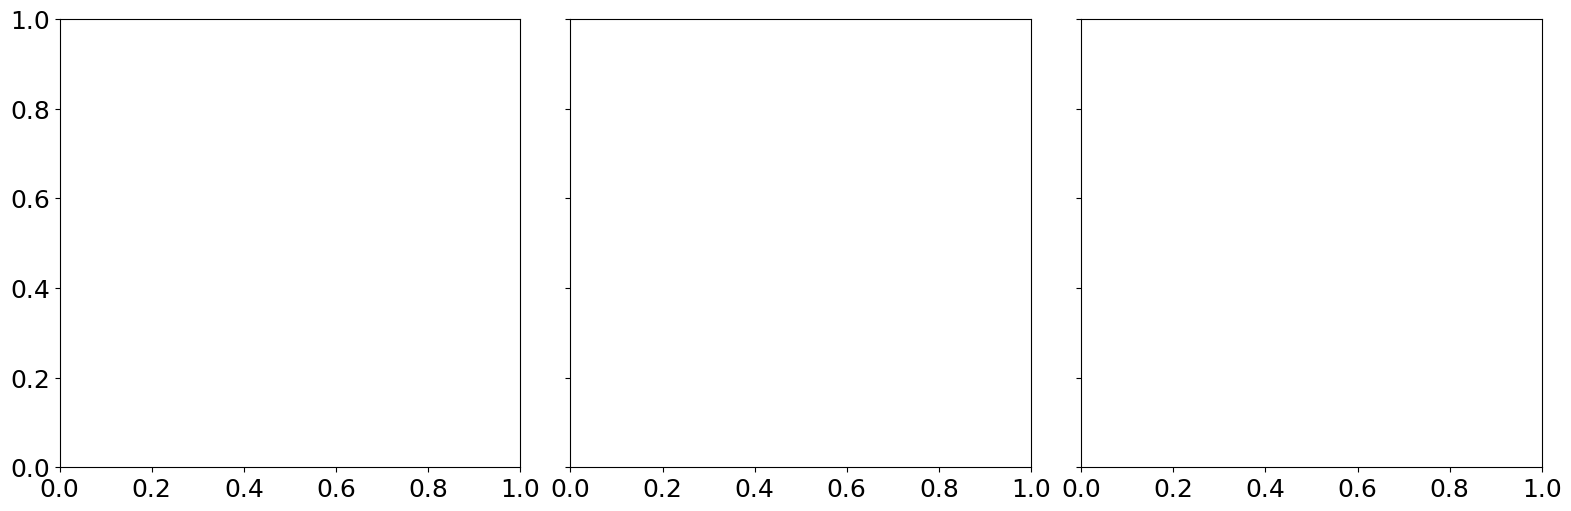

In [22]:
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.ticker import FuncFormatter
print(1000/256)

def concise_ticks(x, pos):
    if x == 0:
        return '0'
    s = f"{x:.2g}"  # Adaptive formatting to two significant digits
    if s.startswith('0'):
        return s[1:]
    elif s.startswith('-0'):
        return '-' + s[2:]
    else:
        return s
    
plt.rcParams.update({
    'font.size': 18,        # Default text size
    'axes.labelsize': 20,   # Axis labels
    'axes.titlesize': 22,   # Plot titles
    'xtick.labelsize': 18,  # X-axis tick labels
    'ytick.labelsize': 18   # Y-axis tick labels
})

fig, axs = plt.subplots(1, 3, figsize=(15.6, 5), sharey=True, constrained_layout=True)

# First subplot
# im1 = axs[0].imshow(X_test[0, 100:150, 100:150, 100:150].mean(2), extent=[390,585, 390, 585])
im1 = axs[0].imshow(X_test[0, :, :, :].mean(0), extent=[0,1000, 0, 1000])
axs[0].set_title("Final (z=0)")
axs[0].set_xlabel("Mpc/h")
axs[0].set_ylabel("Mpc/h")
# axs[0].xaxis.set_major_formatter(FuncFormatter(concise_ticks))
# axs[0].yaxis.set_major_formatter(FuncFormatter(concise_ticks))
# fig.colorbar(im1, ax=axs[0], orientation='vertical')

divider1 = make_axes_locatable(axs[0])
cax1 = divider1.append_axes("right", size="4%", pad=0.1)
colorbar1 = fig.colorbar(im1, cax=cax1)
colorbar1.formatter = FuncFormatter(concise_ticks)
colorbar1.update_ticks()

# Second subplot
# im2 = axs[1].imshow(y_test[0, 100:150, 100:150, 100:150].mean(2), extent=[390, 585, 390, 585])
im2 = axs[1].imshow(y_test[0, :, :, :].mean(0), extent=[0, 1000, 0, 1000])
axs[1].set_title("Initial (z=127)")
axs[1].set_xlabel("Mpc/h")
# axs[1].xaxis.set_major_formatter(FuncFormatter(concise_ticks))
# fig.colorbar(im2, ax=axs[1], orientation='vertical')

divider2 = make_axes_locatable(axs[1])
cax2 = divider2.append_axes("right", size="4%", pad=0.1)
colorbar2 = fig.colorbar(im2, cax=cax2)
colorbar2.formatter = FuncFormatter(concise_ticks)
colorbar2.update_ticks()
# axs[1].set_ylabel("Mpc/h")
# Third subplot
# im3 = axs[2].imshow(one_pred[100:150, 100:150, 100:150].mean(2), extent=[390, 585, 390, 585])
im3 = axs[2].imshow(one_pred[0:, 0:, :].mean(0), extent=[0, 1000, 0, 1000])
axs[2].set_title("Reconstruction")
axs[2].set_xlabel("Mpc/h")
#fig.colorbar(ploty,cax=cbar_ax,ticks=[-1,-0.5,0,0.5,1],location='bottom') #for ticks specific
# axs[2].xaxis.set_major_formatter(FuncFormatter(concise_ticks))
# fig.colorbar(im3, ax=axs[2], orientation='vertical')
# axs[2].set_ylabel("Mpc/h")
# Add a colorbar for all subplots
# cbar = fig.colorbar(im3, ax=axs, location='right', shrink=0.94, aspect=30)

# from mpl_toolkits.axes_grid1 import make_axes_locatable

divider3 = make_axes_locatable(axs[2])
cax3 = divider3.append_axes("right", size="4%", pad=0.1)
colorbar3 = fig.colorbar(im3, cax=cax3)
colorbar3.formatter = FuncFormatter(concise_ticks)
colorbar3.update_ticks()

# Add the colorbar to the new axis
# fig.colorbar(im3, cax=cax)

# fig.tight_layout(rect=[0, 0, 0.9, 1])

# Adjust spacing to remove white space between subplots
# plt.subplots_adjust(wspace=0.01)

# Show the figure
plt.savefig('Plots/reconstruction_three_plot_dec.pdf',format='pdf',bbox_inches='tight')
plt.show()

NameError: name 'y_test' is not defined

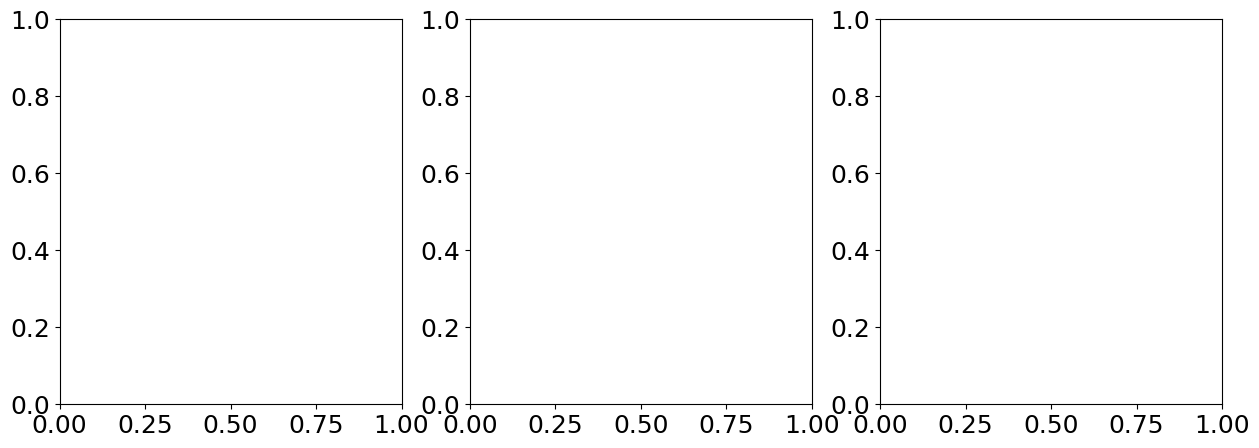

In [23]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 3, figsize=(15, 5))  # Create a figure with 3 subplots

# Plot for the first subplot

ii = 0

# K.clear_session()
# model = UNET3D(256,BoxSize, n_base_filters=8,depth=5,loss_function=tf.keras.losses.mse,initial_learning_rate=1e-3)
# model.load_weights("halo_Distorted_x")
# X_test_x = X_data_halo_x[65:][:,:,:,:,np.newaxis]

# one_pred_x = model.predict(X_test_x[ii][np.newaxis,:,:,:])[0,:,:,:]


im = axes[0].imshow(y_test[ii][:, :, :1].mean(2), extent=[0, 1000, 0, 1000])
axes[0].set_xlabel('Mpc/h')
axes[0].set_ylabel('Mpc/h')
axes[0].set_title("Output: reconstruction")
fig.colorbar(im, ax=axes[0])

# Plot for the second subplot
im = axes[1].imshow(one_pred[:, :, :1].mean(2), extent=[0, 1000, 0, 1000])
axes[1].set_xlabel('Mpc/h')
axes[1].set_ylabel('Mpc/h')
axes[1].set_title("Output: reconstruction")
fig.colorbar(im, ax=axes[1])

# Plot for the third subplot
residual = y_test[ii] - one_pred
im = axes[2].imshow(residual[:, :, :1].mean(2), extent=[0, 1000, 0, 1000])
axes[2].set_xlabel('Mpc/h')
axes[2].set_ylabel('Mpc/h')
axes[2].set_title("Output: reconstruction")
fig.colorbar(im, ax=axes[2])

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

Pkcross = PKL.XPk([X_test[ii,:,:,:,0],y_test[ii,:,:,:,0]], 1000., axis=0, MAS=['PCS',"PCS"], threads=8)
cross_pre = Pkcross.XPk[:,0,0]/np.sqrt(Pkcross.Pk[:,0,0]*Pkcross.Pk[:,0,1])
plt.plot(Pkcross.k3D,cross_pre,label="final")

# Pkcross_recon_s = PKL.XPk([one_pred_s[:,:,:,0],y_test[ii,:,:,:,0]], 1000., axis=0, MAS=[None,"PCS"], threads=8)
# cross_recon_s = Pkcross_recon_s.XPk[:,0,0]/np.sqrt(Pkcross_recon_s.Pk[:,0,0]*Pkcross_recon_s.Pk[:,0,1])

Pkcross_recon = PKL.XPk([one_pred[:,:,:,0],y_test[ii,:,:,:,0]], 1000., axis=0, MAS=["PCS","PCS"], threads=8)
cross_recon = Pkcross_recon.XPk[:,0,0]/np.sqrt(Pkcross_recon.Pk[:,0,0]*Pkcross_recon.Pk[:,0,1])

plt.plot(Pkcross_recon.k3D,cross_recon,label="$C_{\\rm residual,init}$")
# plt.plot(Pkcross_recon_s.k3D,cross_recon_s,label="$C_{\\rm second recon,init}$, $z=127-127$, $256^3$")
plt.plot(Pkcross_recon_v.k3D,cross_recon_v,label="$C_{\\rm recon,init}$")


plt.xlim(0,100*kF)
plt.legend(fontsize='medium', loc='lower left')
plt.xlabel("$k$ [h/Mpc]")
plt.ylabel("$C_{X,Y}(k)$")
plt.ylim(0,1)
plt.grid()
# plt.savefig('Plots/sigma_8.pdf',format='pdf',bbox_inches='tight')
plt.show()


NameError: name 'Pkcross_recon' is not defined

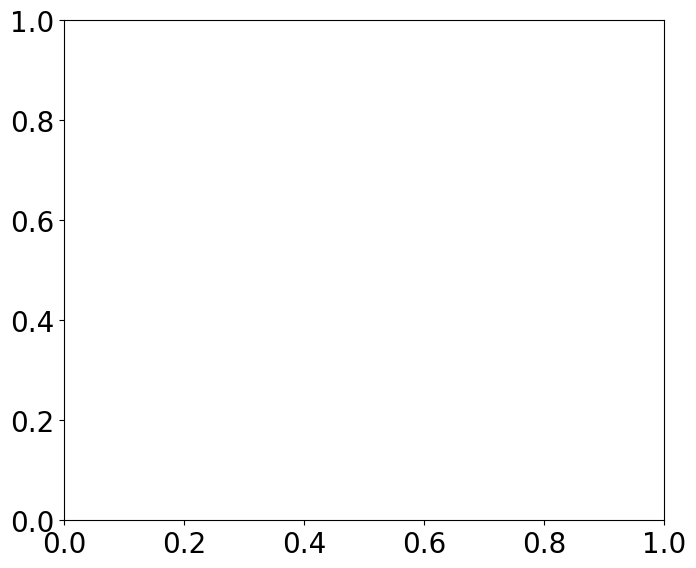

In [24]:
from matplotlib.pyplot import figure, show, rcParams
import matplotlib.pylab as pylab
from matplotlib.ticker import FuncFormatter, AutoMinorLocator, MultipleLocator


def to_percent(y, position):
    # Convert the y-axis values to percentage string format without a decimal point for whole numbers
    if y % 1 == 0:
        s = f"{int(y)}"
    else:
        s = f"{y:.1f}"
    return s + '%'

plt.rcParams.update({
    'font.size': 18,        # Default text size
    'axes.labelsize': 22,   # Axis labels
    'axes.titlesize': 22,   # Plot titles
    'xtick.labelsize': 20,  # X-axis tick labels
    'ytick.labelsize': 20,   # Y-axis tick labels
    'font.weight': 'normal', # Set global font weight to normal
    'axes.labelweight': 'normal', # Ensure normal weight for axis labels
    'axes.titleweight': 'normal'  # Ensure normal weight for titles
})
fig = plt.figure(figsize=(6, 5))
frame = fig.add_axes([0,0,1,1])

frame.plot(Pkcross_recon.k3D,cross_recon,label="reconstruction")
frame.plot(Pkcross.k3D,cross_pre,label="final")

frame.set_xlim(0,81.25*kF)

frame.set_ylim(0,1)

frame.legend(loc = 'lower left', fontsize =16)
# frame.set_title()

frame.set_xlabel("$k$ [h/Mpc]")

frame.grid(which='major', linestyle='--', linewidth='0.6', color='black')
frame.grid(which='minor', linestyle='-', linewidth='0.25', color='gray')
frame.xaxis.set_minor_locator(AutoMinorLocator())
frame.yaxis.set_minor_locator(AutoMinorLocator())

plt.xlabel("$k$ [h/Mpc]")
plt.ylabel("$C_{X,Y}(k)$")
plt.savefig('Plots/compare_train.png',format='png',bbox_inches='tight')

fig.show()



In [25]:
#computing power spectra using pylians doc for the monopole and quadrupole
import Pk_library as PKL
BoxSize = 1000. #Mpc/h
kF = 2*np.pi/BoxSize #h/Mpc
grid = 256
threads=8
axis =0
#single example with data

Pk = PKL.Pk(X_test[0][:,:,:,0], BoxSize, axis, 'PCS', threads, verbose =True)
k       = Pk.k3D
Pk0     = Pk.Pk[:,0] #monopole
Pk2     = Pk.Pk[:,1] #quadrupole


#single example with prediction
pred = model.predict(X_test[0][np.newaxis,:,:,:], verbose=True)[0,:,:,:,0]
print(pred.shape)
Pk = PKL.Pk(pred, BoxSize, axis, 'PCS', threads, verbose= True)
k       = Pk.k3D
Pk0_pred     = Pk.Pk[:,0] #monopole
Pk2_pred     = Pk.Pk[:,1] #quadrupole






NameError: name 'X_test' is not defined

In [26]:
%%time
%load_ext autoreload
%autoreload 2
from UNET import UNET3D
from powerspec import PowSpec
from DensityFieldTools import DensityField3D, PkX
from DensityFieldToolsTensor import DensityField3DTF
import numpy as np


BoxSize = 1000. #Mpc/h
kF = 2*np.pi/BoxSize #h/Mpc
grid = 256

K.clear_session()
model = UNET3D(256,BoxSize, n_base_filters=8,depth=5,loss_function=tf.keras.losses.mse,initial_learning_rate=1e-3)
model.load_weights("halo_Distorted_x")


# single example
pred = model.predict(X_data_halo_x[1][np.newaxis,:,:,:], verbose=True)[0,:,:,:,0]
print(pred.shape)
#single example after this only have to run the fields with the powspec
powspec = PowSpec(256,1000.,'PCS')
pk_tf = powspec.Pk(pred)

# for multiple measurments of power spectra

Pk_z0_array = np.zeros((500,  pk_tf.shape[0],pk_tf.shape[1],))
Pk_z127_rec_array = np.zeros((500, pk_tf.shape[0],pk_tf.shape[1],))
print("loop starts")
typey = 's8_p'
#power spectra for the final z=0 data
for i in range(500):
    j = i
    print(j) #keep track how for in the loop we are
    X_data =  np.load(f"/scratch/s3487202/Halo_Data/{typey}/df_h_256_PCS_{typey}_0_dx_{j}.npy")
    data_single = np.squeeze(X_data)
    Pks = powspec.Pk(data_single)
    Pk_z0_array[i]= Pks#[:,:][:81]
    preds = np.squeeze(model.predict(data_single[np.newaxis,:,:,:,np.newaxis], verbose=False)[0,:,:,:])

    Pks_pred = powspec.Pk(preds)
    Pk_z127_rec_array[i] = Pks_pred#[:,:][:81]#*(0.011402733**2 / 0.01052**2)


#saving the data

print(Pk_z0_array.shape)
print(Pk_z127_rec_array.shape)
print(Pk_z127_rec_array[499])



# np.save(f"Results/Power_Spectra/halo_data_z0_{typey}_0-2999.npy", Pk_z0_array)
# np.save(f"Results/Power_Spectra/halo_data_z127_{typey}_0-2999.npy", Pk_z127_rec_array)

np.save(f"/scratch/s3487202/Results/power_spectrum/halo_data_z0_{typey}.npy", Pk_z0_array)
np.save(f"/scratch/s3487202/Results/power_spectrum/halo_data_z127_{typey}.npy", Pk_z127_rec_array)

ModuleNotFoundError: No module named 'tensorflow'

In [32]:
%%time 
#calcuation of the bispectra
#single example
from bispec import BiSpec
from UNET import UNET3D

BoxSize = 1000. #Mpc/h
kF = 2*np.pi/BoxSize #h/Mpc
grid = 256

K.clear_session()
model = UNET3D(256,BoxSize, n_base_filters=8,depth=5,loss_function=tf.keras.losses.mse,initial_learning_rate=1e-3)
model.load_weights("halo_Distorted_x")
print(X_data_halo_x[1][np.newaxis,:,:,:].shape)
pred =  np.squeeze(model.predict(X_data_halo_x[1][np.newaxis,:,:,:,np.newaxis], verbose=False)[0,:,:,:])
print(pred.shape)
bispec = BiSpec(256,1000.,3.,3.,27,None,verbose=False)
bk_tf = bispec.Bk(pred, verbose = False)

Bk_z0_array = np.zeros((500, bk_tf.shape[0],bk_tf.shape[1],))
Bk_z127_rec_array =  np.zeros((500, bk_tf.shape[0],bk_tf.shape[1],))
print("loop starts")
typey = 's8_p'

for i in range(500):
    j= i
    print(j) #keep track how for in the loop we are
    X_data =  np.load(f"/scratch/s3487202/Halo_Data/{typey}/df_h_256_PCS_{typey}_0_dx_{j}.npy")
    data_single = np.squeeze(X_data)
    Bks = bispec.Bk(data_single,verbose=False)
    Bk_z0_array[i]= Bks#[:,:][:81]
    preds = np.squeeze(model.predict(data_single[np.newaxis,:,:,:,np.newaxis], verbose=False)[0,:,:,:])
    Bks = bispec.Bk(preds,verbose=False)
    Bk_z127_rec_array[i] = Bks
    
print(Bk_z0_array.shape)
print(Bk_z127_rec_array.shape)
print(Bk_z127_rec_array[499])


np.save(f"/scratch/s3487202/Results/bispectrum/halo_data_z0_{typey}.npy", Bk_z0_array)
np.save(f"/scratch/s3487202/Results/bispectrum/halo_data_z127_{typey}.npy", Bk_z127_rec_array)


(1, 256, 256, 256)
(256, 256, 256)
loop starts
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265

In [11]:
print(Bk_z127_rec_array[499])
print(Bk_z127_rec_array[498])

[[ 3.00000000e+00  3.00000000e+00  3.00000000e+00 ...  2.03642598e+04
  -1.57320000e+09  5.40659805e+04]
 [ 6.00000000e+00  3.00000000e+00  3.00000000e+00 ...  2.03642598e+04
  -8.81980864e+08  7.11659844e+04]
 [ 6.00000000e+00  6.00000000e+00  3.00000000e+00 ...  2.03642598e+04
  -1.44442208e+08  2.25723938e+05]
 ...
 [ 8.10000000e+01  8.10000000e+01  7.50000000e+01 ...  4.98294973e+00
   1.04292885e+02  1.05505165e+09]
 [ 8.10000000e+01  8.10000000e+01  7.80000000e+01 ...  3.12655926e+00
   7.35907974e+01  1.09347571e+09]
 [ 8.10000000e+01  8.10000000e+01  8.10000000e+01 ...  1.97906363e+00
   5.38315773e+01  1.13973338e+09]]
[[ 3.00000000e+00  3.00000000e+00  3.00000000e+00 ...  2.11546562e+04
  -1.06381126e+09  5.40659805e+04]
 [ 6.00000000e+00  3.00000000e+00  3.00000000e+00 ...  2.11546562e+04
   1.85466768e+08  7.11659844e+04]
 [ 6.00000000e+00  6.00000000e+00  3.00000000e+00 ...  2.11546562e+04
  -4.78548480e+08  2.25723938e+05]
 ...
 [ 8.10000000e+01  8.10000000e+01  7.5000000

In [9]:
typey = 'fiducial'
array  = np.load(f"/scratch/s3487202/Results/bispectrum/halo_data_z0_{typey}_3000-4499.npy")
array_2 = np.load(f"/scratch/s3487202/Results/bispectrum/halo_data_z0_{typey}_4500-5999.npy")

array_comb = np.concetenate(array,array)



(1500, 2276, 8)
[[3.00000000e+00 3.00000000e+00 3.00000000e+00 ... 5.66965625e+04
  4.15589811e+09 5.40659805e+04]
 [6.00000000e+00 3.00000000e+00 3.00000000e+00 ... 5.66965625e+04
  4.27862840e+07 7.11659844e+04]
 [6.00000000e+00 6.00000000e+00 3.00000000e+00 ... 5.66965625e+04
  1.76961766e+09 2.25723938e+05]
 ...
 [8.10000000e+01 8.10000000e+01 7.50000000e+01 ... 1.14965173e+03
  2.12460150e+06 1.05505165e+09]
 [8.10000000e+01 8.10000000e+01 7.80000000e+01 ... 1.01937146e+03
  1.95484275e+06 1.09347571e+09]
 [8.10000000e+01 8.10000000e+01 8.10000000e+01 ... 9.04730042e+02
  1.72032238e+06 1.13973338e+09]]


In [14]:
typey = 'fiducial'
# array_z0 = np.load(f"Results/Power_Spectra/halo_data_z0_{typey}_0-2999.npy")
# array_z127 = np.load(f"Results/Power_Spectra/halo_data_z127_{typey}_0-2999.npy")
# print(array_z0.shape)
np.save(f"/scratch/s3487202/Results/bispectrum/halo_data_z0_{typey}_6000-8999.npy", Bk_z0_array)
np.save(f"/scratch/s3487202/Results/bispectrum/halo_data_z127_{typey}_6000-8999.npy", Bk_z127_rec_array)

print(Bk_z127_rec_array[1499])
print(Bk_z127_rec_array[1498])

[[ 3.00000000e+00  3.00000000e+00  3.00000000e+00 ...  1.95262793e+04
   1.20617416e+08  5.40659805e+04]
 [ 6.00000000e+00  3.00000000e+00  3.00000000e+00 ...  1.95262793e+04
  -8.24011648e+08  7.11659844e+04]
 [ 6.00000000e+00  6.00000000e+00  3.00000000e+00 ...  1.95262793e+04
  -4.13985760e+07  2.25723938e+05]
 ...
 [ 8.10000000e+01  8.10000000e+01  7.50000000e+01 ...  5.00672817e+00
   1.06454681e+02  1.05505165e+09]
 [ 8.10000000e+01  8.10000000e+01  7.80000000e+01 ...  3.10936952e+00
   7.23961029e+01  1.09347571e+09]
 [ 8.10000000e+01  8.10000000e+01  8.10000000e+01 ...  1.96847069e+00
   5.02563744e+01  1.13973338e+09]]
[[ 3.00000000e+00  3.00000000e+00  3.00000000e+00 ...  2.02114668e+04
   6.38587800e+07  5.40659805e+04]
 [ 6.00000000e+00  3.00000000e+00  3.00000000e+00 ...  2.02114668e+04
  -1.18396792e+08  7.11659844e+04]
 [ 6.00000000e+00  6.00000000e+00  3.00000000e+00 ...  2.02114668e+04
   3.52624160e+08  2.25723938e+05]
 ...
 [ 8.10000000e+01  8.10000000e+01  7.5000000

In [9]:
import Pk_library as PKL
kF = 2*np.pi/BoxSize
numbers = list(range(81)) 
cross_pre_x_arr = np.zeros((len(numbers),221), dtype=np.float32)
cross_pre_arr = np.zeros((len(numbers),221), dtype=np.float32)
for i in numbers:

    Pkcross_pre_x = PKL.XPk([X_data_halo_x[i],y_data_cut[i]], 1000., axis=0, MAS=['PCS',"PCS"], threads=8)
    cross_pre_x = Pkcross_pre_x.XPk[:,0,0]/np.sqrt(Pkcross_pre_x.Pk[:,0,0]*Pkcross_pre_x.Pk[:,0,1])


    Pkcross_pre = PKL.XPk([X_data_halo[i],y_data_cut[i]], 1000., axis=0, MAS=["PCS","PCS"], threads=8)
    cross_pre = Pkcross_pre.XPk[:,0,0]/np.sqrt(Pkcross_pre.Pk[:,0,0]*Pkcross_pre.Pk[:,0,1])
    
    cross_pre_x_arr[i] = cross_pre_x
    cross_pre_arr[i] = cross_pre


Computing power spectra of the fields...
Time FFTS = 0.16
Time loop = 0.88
Time taken = 1.04 seconds

Computing power spectra of the fields...
Time FFTS = 0.14
Time loop = 0.90
Time taken = 1.05 seconds

Computing power spectra of the fields...
Time FFTS = 0.14
Time loop = 0.88
Time taken = 1.02 seconds

Computing power spectra of the fields...
Time FFTS = 0.14
Time loop = 0.88
Time taken = 1.02 seconds

Computing power spectra of the fields...
Time FFTS = 0.14
Time loop = 0.90
Time taken = 1.05 seconds

Computing power spectra of the fields...
Time FFTS = 0.14
Time loop = 0.91
Time taken = 1.05 seconds

Computing power spectra of the fields...
Time FFTS = 0.15
Time loop = 0.91
Time taken = 1.06 seconds

Computing power spectra of the fields...
Time FFTS = 0.15
Time loop = 0.90
Time taken = 1.05 seconds

Computing power spectra of the fields...
Time FFTS = 0.15
Time loop = 0.90
Time taken = 1.05 seconds

Computing power spectra of the fields...
Time FFTS = 0.15
Time loop = 0.90
Time t

In [10]:


cross_recon_x_arr = np.zeros((len(numbers),221), dtype=np.float32)
cross_recon_arr = np.zeros((len(numbers),221), dtype=np.float32)

K.clear_session()
model = UNET3D(256,BoxSize, n_base_filters=8,depth=5,loss_function=tf.keras.losses.mse,initial_learning_rate=1e-3)
model.load_weights("halo_Distorted_x")
for i in numbers:

    X_test_x = X_data_halo_x[i,:,:,:,np.newaxis]
    y_test_x = y_data_cut[i,:,:,:,np.newaxis]
    one_pred_x = model.predict(X_test_x[np.newaxis,:,:,:])[0,:,:,:]
    Pkcross_recon_x = PKL.XPk([one_pred_x[:,:,:,0],y_test_x[:,:,:,0]], 1000., axis=0, MAS=["PCS","PCS"], threads=8)
    cross_recon_x = Pkcross_recon_x.XPk[:,0,0]/np.sqrt(Pkcross_recon_x.Pk[:,0,0]*Pkcross_recon_x.Pk[:,0,1])

    cross_recon_x_arr[i] = cross_recon_x


K.clear_session()
model = UNET3D(256,BoxSize, n_base_filters=8,depth=5,loss_function=tf.keras.losses.mse,initial_learning_rate=1e-3)
model.load_weights("halo_not_Distorted")
for i in numbers:  

    X_test = X_data_halo[i,:,:,:,np.newaxis]
    y_test = y_data_cut[i,:,:,:,np.newaxis]
    one_pred = model.predict(X_test[np.newaxis,:,:,:])[0,:,:,:]
    Pkcross_recon = PKL.XPk([one_pred[:,:,:,0],y_test[:,:,:,0]], 1000., axis=0, MAS=["PCS","PCS"], threads=8)
    cross_recon = Pkcross_recon.XPk[:,0,0]/np.sqrt(Pkcross_recon.Pk[:,0,0]*Pkcross_recon.Pk[:,0,1])

    cross_recon_arr[i] = cross_recon


1/1 [==============================] - 10s 10s/step

Computing power spectra of the fields...
Time FFTS = 0.14
Time loop = 0.93
Time taken = 1.07 seconds
1/1 [==============================] - 0s 276ms/step

Computing power spectra of the fields...
Time FFTS = 0.14
Time loop = 0.89
Time taken = 1.03 seconds
1/1 [==============================] - 0s 276ms/step

Computing power spectra of the fields...
Time FFTS = 0.14
Time loop = 0.89
Time taken = 1.03 seconds
1/1 [==============================] - 0s 277ms/step

Computing power spectra of the fields...
Time FFTS = 0.14
Time loop = 0.89
Time taken = 1.04 seconds
1/1 [==============================] - 0s 275ms/step

Computing power spectra of the fields...
Time FFTS = 0.14
Time loop = 0.90
Time taken = 1.04 seconds
1/1 [==============================] - 0s 274ms/step

Computing power spectra of the fields...
Time FFTS = 0.15
Time loop = 0.89
Time taken = 1.03 seconds
1/1 [==============================] - 0s 276ms/step

Computing power s

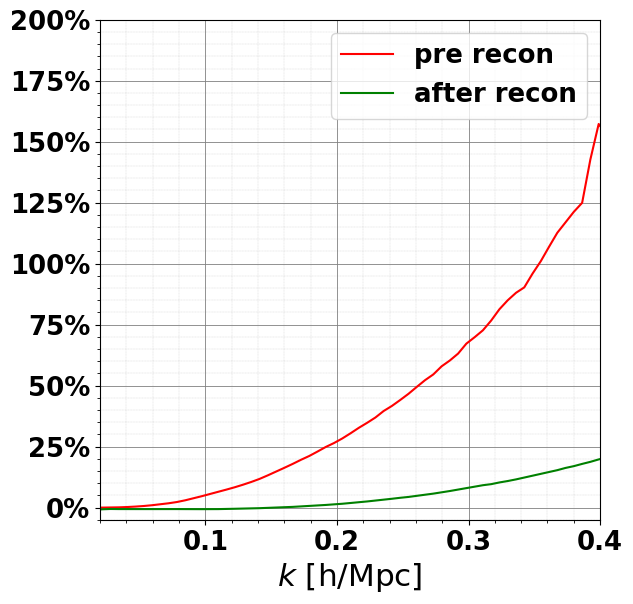

In [23]:
from matplotlib.pyplot import figure, show, rcParams
import matplotlib.pylab as pylab
from matplotlib.ticker import FuncFormatter, AutoMinorLocator, MultipleLocator


def to_percent(y, position):
    # Convert the y-axis values to percentage string format without a decimal point for whole numbers
    if y % 1 == 0:
        s = f"{int(y)}"
    else:
        s = f"{y:.1f}"
    return s + '%'

params = {'legend.fontsize': 'x-large',
          'figure.figsize': (5, 5),
         'axes.labelsize': 'xx-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large',
         'font.weight': 'bold'}
pylab.rcParams.update(params)

difference = np.mean((cross_pre_arr - cross_pre_x_arr)/cross_pre_x_arr,axis = 0)*100
difference_recon = np.mean((cross_recon_arr - cross_recon_x_arr)/cross_recon_x_arr,axis = 0)*100


fig = figure()
frame = fig.add_axes([0,0,1,1])
frame.plot(Pkcross_recon.k3D,difference,label='pre recon' ,color='r')
frame.plot(Pkcross_recon.k3D,difference_recon,label='after recon' ,color='g')

frame.set_xlim(0.02,0.4)
frame.set_ylim(-5,200)

frame.legend()
# frame.set_title()

frame.set_xlabel("$k$ [h/Mpc]")
formatter = FuncFormatter(to_percent)
frame.yaxis.set_major_formatter(formatter)

frame.grid(which='major', linestyle='-', linewidth='0.6', color='gray')
frame.grid(which='minor', linestyle=':', linewidth='0.2', color='gray') 
frame.xaxis.set_minor_locator(AutoMinorLocator())
frame.yaxis.set_minor_locator(AutoMinorLocator())

fig.savefig('Plots/correlation_diff.png',bbox_inches="tight")

fig.show()

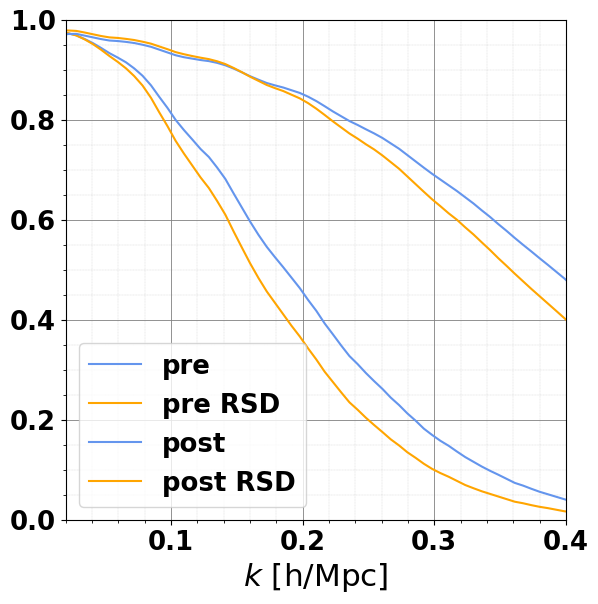

In [24]:
pre = np.mean(cross_pre_arr,axis=0)
pre_x = np.mean(cross_pre_x_arr,axis = 0)
recon = np.mean(cross_recon_arr,axis=0)
recon_x = np.mean(cross_recon_x_arr,axis = 0)

fig = figure()
frame = fig.add_axes([0,0,1,1])
frame.plot(Pkcross_recon.k3D,pre,label='pre' ,color='cornflowerblue')
frame.plot(Pkcross_recon.k3D,pre_x,label='pre RSD' ,color='orange')
frame.plot(Pkcross_recon.k3D,recon,label='post' ,color='cornflowerblue')
frame.plot(Pkcross_recon.k3D,recon_x,label='post RSD' ,color='orange')

frame.set_xlim(0.02,0.4)
frame.set_ylim(0,1)

frame.legend()
# frame.set_title()

frame.set_xlabel("$k$ [h/Mpc]")


frame.grid(which='major', linestyle='-', linewidth='0.6', color='gray')
frame.grid(which='minor', linestyle=':', linewidth='0.2', color='gray')
frame.xaxis.set_minor_locator(AutoMinorLocator())
frame.yaxis.set_minor_locator(AutoMinorLocator())
fig.savefig('Plots/all_correlations.png',bbox_inches="tight")
fig.show()

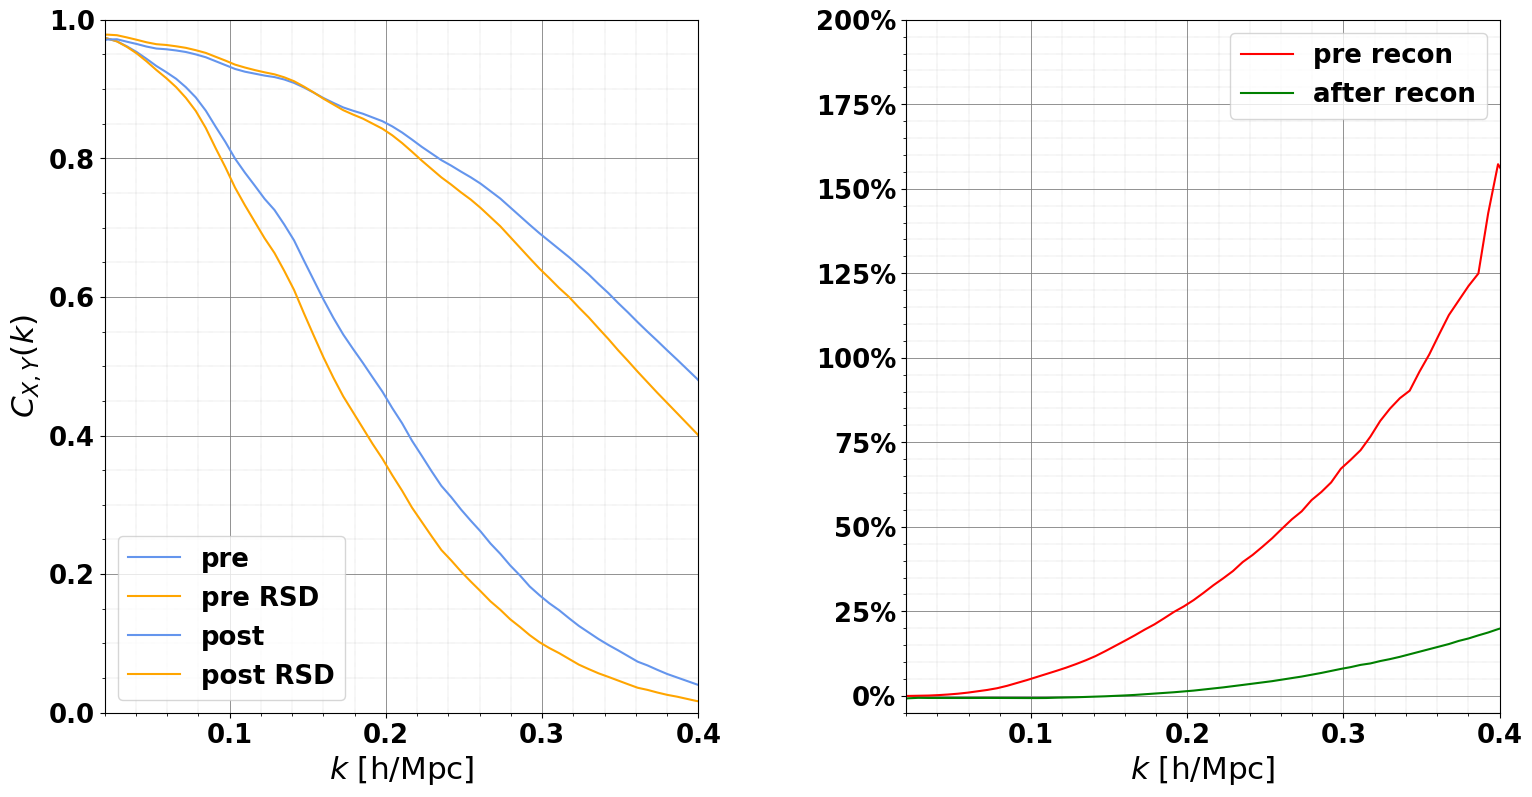

In [28]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 9))

# First subplot
ax1.plot(Pkcross_recon.k3D, pre, label='pre', color='cornflowerblue')
ax1.plot(Pkcross_recon.k3D, pre_x, label='pre RSD', color='orange')
ax1.plot(Pkcross_recon.k3D, recon, label='post', color='cornflowerblue')
ax1.plot(Pkcross_recon.k3D, recon_x, label='post RSD', color='orange')
ax1.set_xlim(0.02, 0.4)
ax1.set_ylim(0, 1)
ax1.legend()
ax1.set_xlabel("$k$ [h/Mpc]")
ax1.set_ylabel("$C_{X,Y}(k)$")
ax1.grid(which='major', linestyle='-', linewidth='0.6', color='gray')
ax1.grid(which='minor', linestyle=':', linewidth='0.25', color='gray')
ax1.xaxis.set_minor_locator(AutoMinorLocator())
ax1.yaxis.set_minor_locator(AutoMinorLocator())
# Second subplot
ax2.plot(Pkcross_recon.k3D, difference, label='pre recon', color='r')
ax2.plot(Pkcross_recon.k3D, difference_recon, label='after recon', color='g')
ax2.set_xlim(0.02, 0.4)
ax2.set_ylim(-5, 200)
ax2.legend()
ax2.set_xlabel("$k$ [h/Mpc]")
formatter = FuncFormatter(to_percent)
ax2.yaxis.set_major_formatter(formatter)
ax2.grid(which='major', linestyle='-', linewidth='0.6', color='gray')
ax2.grid(which='minor', linestyle=':', linewidth='0.25', color='gray')
ax2.xaxis.set_minor_locator(AutoMinorLocator())
ax2.yaxis.set_minor_locator(AutoMinorLocator())
plt.subplots_adjust(wspace=0.35)
# Save the entire figure

fig.savefig('Plots/combined_plots.png', bbox_inches="tight")

# Show the plot
plt.show()

From here the analysis can start using all the calculated spectra of the simulations